<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Machine learning - Credit Card Fraud Detection </b></div>

![](https://img.freepik.com/vetores-gratis/pagina-de-destino-isometrica-de-seguranca-de-cartao-de-credito-robo_107791-1353.jpg?t=st=1722561888~exp=1722565488~hmac=96b68220ff90c53ec118f6fb2f43a0e229e9119d7b1b12a3ccccbb37b2dd0fd8&w=740)

<a href="https://br.freepik.com/vetores-gratis/pagina-de-destino-isometrica-de-seguranca-de-cartao-de-credito-robo_7588634.htm#query=machine%20learning%20credit&position=35&from_view=search&track=ais&uuid=f564bf38-b380-4976-b5b7-ef8c82b91fa6">Imagem de upklyak</a> no Freepik

## Part 1- Credit Card Fraud Detection

### Business Problem: Credit Card Fraud Detection

#### Context
The ability to detect fraudulent credit card transactions is crucial for credit card companies to protect their customers and prevent unauthorized charges. This problem is a common challenge in machine learning due to the highly imbalanced nature of the data, where the majority of transactions are legitimate, and a very small minority is fraudulent.

#### Objective
Develop a machine learning model capable of accurately identifying fraudulent transactions, minimizing false positives (legitimate transactions classified as fraudulent) and false negatives (fraudulent transactions not detected).

#### Dataset Description
The dataset contains credit card transactions made in September 2013 by European cardholders. It presents transactions that occurred over two days, containing 284,807 transactions, of which 492 are fraudulent.

##### Dataset Features:

- **Time**: Number of seconds elapsed between this transaction and the first transaction in the dataset.

- **V1 - V28**: Principal components obtained through PCA (Principal Component Analysis) to protect user identities and sensitive information.

- **Amount**: Transaction amount.

- **Class**: Response variable, where 1 indicates a fraudulent transaction and 0 indicates a legitimate transaction.

#### Challenges:

1. **Data Imbalance**: The fraud class represents only 0.172% of all transactions.

2. **Interpretation of Principal Components**: Features V1 to V28 are results of a PCA transformation, making direct interpretation difficult.

3. **Performance Evaluation**: Due to the imbalance, confusion matrix accuracy is not adequate. It is recommended to use the Area Under the Precision-Recall Curve (AUPRC) to measure model performance.

#### Proposed Methodology:

1. **Exploratory Data Analysis (EDA)**:
   
   - Understand the distribution of 'Time' and 'Amount' variables.
   
   - Check the correlation among the principal components.
   
   - Visualize the distribution of fraudulent and legitimate transactions.

2. **Preprocessing**:
   
   - Handle missing values (if any).
   
   - Normalize/Standardize 'Time' and 'Amount' variables.
   
   - Use balancing techniques like oversampling (SMOTE) or undersampling to address the imbalance.

3. **Modeling**:
   
   - Test different machine learning algorithms, such as:
     
     - Logistic Regression
     
     - Random Forest
     
     - Gradient Boosting
     
     - Neural Networks
   
   - Use cross-validation to ensure model robustness.

4. **Evaluation**:
   
   - Use appropriate metrics like AUPRC, along with precision, recall, and F1-score to evaluate performance.
   
   - Analyze the confusion matrix to identify error patterns.

5. **Deployment**:
   
   - Develop a pipeline for real-time fraud detection.
   
   - Monitor model performance in production and adjust as necessary.

#### Conclusion

Detecting fraud in credit card transactions is a critical issue that requires robust and well-calibrated machine learning models. The approach described above aims to develop an efficient and effective model capable of protecting customers and minimizing financial losses for credit card companies.

In [1]:
!pip install watermark
!pip install imblearn

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv
/kaggle/input/creditcardfraud/creditcard.csv
/kaggle/input/credit-card-approval-prediction/credit_record.csv
/kaggle/input/credit-card-approval-prediction/application_record.csv


In [3]:
# System libraries
import re
import os
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuration for graphs width and layout of graphs
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove warnings
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.10.13
Author: Library versions

pandas    : 2.2.2
watermark : 2.4.3
plotly    : 5.18.0
numpy     : 1.26.4
re        : 2.2.1
matplotlib: 3.7.5
seaborn   : 0.12.2



# Part 2) Database

In [4]:
# Database 
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
# Viewing the first 5 data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Viewing the last 5 data
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
# Rows and columns
data.shape

(284807, 31)

In [8]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Data type
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

# Part 3) Exploratory data analysis

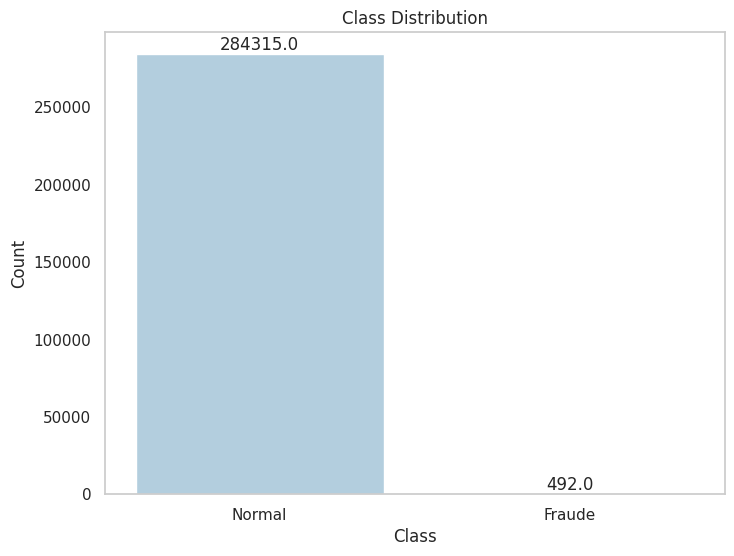

In [10]:
# Function to convert the binary variable "Class" to string
def fraude(dado):
    if dado == 0:
        return "Normal"
    else:
        return "Fraude"

# Copy the data
dados_tmp = data.copy()
dados_tmp['Class'] = dados_tmp['Class'].apply(fraude)

# Figure size
plt.figure(figsize=(8, 6))

# Bar plot with counts on bars and different colors
ax = sns.countplot(data=dados_tmp, x='Class', palette='Blues')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# Adding counts on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.grid(False)
plt.show()

del dados_tmp

**- Analyzing the distribution of transaction values and the time of each transaction for both normal and fraudulent situations**

This analysis involves a detailed examination of how transaction values and timestamps are distributed across normal and fraudulent activities. By comparing these distributions, we aim to identify patterns or anomalies that could indicate fraudulent behavior. For example, fraudulent transactions might cluster at certain times of the day or involve unusual amounts compared to typical transactions. This step is crucial for understanding the underlying characteristics of the data and for designing more effective detection models.

In [11]:
# Import necessary modules from sklearn for scaling
from sklearn.preprocessing import StandardScaler, RobustScaler

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Scale the 'Amount' column using RobustScaler
# This transformation helps in reducing the impact of outliers by scaling the data based on the interquartile range (IQR)
data['Amount'] = robust_scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Scale the 'Time' column using RobustScaler
# Similarly, the 'Time' data is scaled to manage potential outliers and make the data more suitable for modeling
data['Time'] = robust_scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Display the first few rows of the transformed dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


**- Splitting the dataset into training and testing variables. In this case, we will reserve the entire dataset for final testing, while using only a balanced subset for training the model.**

This approach involves first partitioning the dataset into two distinct sets: one for training the model and the other for evaluating its performance. However, instead of directly using the entire dataset for both training and testing, we focus on addressing the class imbalance issue often present in datasets, especially in fraud detection scenarios. For the training phase, we utilize only a balanced subset of the data, where the number of fraudulent transactions is made comparable to the number of normal transactions. This balancing technique helps the model to learn effectively without being biased towards the majority class (i.e., normal transactions).

After the model has been trained on this balanced subset, we then evaluate its performance on the entire, unbalanced dataset. This final testing phase is crucial because it provides a more realistic measure of the model’s effectiveness in real-world scenarios, where fraudulent transactions are rare. The goal is to ensure that the model performs well on both classes—detecting fraud accurately while minimizing false positives on normal transactions.

In [12]:
# Separate the dataset into features (X) and target variable (Y)
X = data.drop(['Class'], axis=1)  # Features: all columns except 'Class'
Y = data['Class']  # Target: 'Class' column

# Import necessary modules for cross-validation
from sklearn.model_selection import KFold, StratifiedKFold

# Initialize StratifiedKFold for cross-validation
# StratifiedKFold ensures that each fold of the cross-validation process has the same proportion of each class
strat_kfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Split the data using StratifiedKFold and iterate through each fold
for indice_treino, indice_teste in strat_kfold.split(X, Y):
    print("Train Indices:", indice_treino, "Test Indices:", indice_teste)
    X_treino, X_teste = X.iloc[indice_treino], X.iloc[indice_teste]  # Extract training and testing features
    Y_treino, Y_teste = Y.iloc[indice_treino], Y.iloc[indice_teste]  # Extract training and testing labels

# Convert the training and testing datasets to NumPy arrays
X_treino = X_treino.values
X_teste = X_teste.values
Y_treino = Y_treino.values
Y_teste = Y_teste.values

# Calculate the unique class labels and their respective counts in the training and testing sets
label_treino_unico, label_contagem_treino = np.unique(Y_treino, return_counts=True)
label_teste_unico, label_contagem_teste = np.unique(Y_teste, return_counts=True)

# Print the distribution of classes in the training and testing datasets
print('-' * 100)
print('Class Distribution: \n')
print('-' * 100)
print(label_contagem_treino / len(Y_treino))  # Proportion of each class in the training set
print('-' * 100)
print(label_contagem_teste / len(Y_teste))  # Proportion of each class in the testing set

Train Indices: [ 30473  30496  31002 ... 284804 284805 284806] Test Indices: [    0     1     2 ... 57017 57018 57019]
Train Indices: [     0      1      2 ... 284804 284805 284806] Test Indices: [ 30473  30496  31002 ... 113964 113965 113966]
Train Indices: [     0      1      2 ... 284804 284805 284806] Test Indices: [ 81609  82400  83053 ... 170946 170947 170948]
Train Indices: [     0      1      2 ... 284804 284805 284806] Test Indices: [150654 150660 150661 ... 227866 227867 227868]
Train Indices: [     0      1      2 ... 227866 227867 227868] Test Indices: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Class Distribution: 

----------------------------------------------------------------------------------------------------
[0.99827076 0.00172924]
----------------------------------------------------------------------------------------------------
[0.99827952 0.00172048]


**In this step, we will employ the process of random undersampling to address class imbalance in our dataset. This technique involves selectively removing instances from the majority class to create a more balanced dataset, thereby reducing the risk of overfitting.**

In our case, we identified that there are 492 fraudulent transactions in the dataset. To balance the dataset, we will randomly select the same number of non-fraudulent transactions (492) from the majority class. By doing this, we ensure that our model is exposed to an equal number of examples from both classes, which is critical for learning to distinguish between fraudulent and non-fraudulent activities effectively. After selecting the balanced subset, we will shuffle the data to randomize the order of transactions. This step is important as it prevents the model from learning any unintended patterns based on the order of the data, ensuring that it focuses solely on the intrinsic patterns that differentiate normal transactions from fraudulent ones. By following this approach, we aim to build a model that is not only robust and accurate but also generalizes well to unseen data, avoiding the pitfalls of overfitting that often occur when dealing with highly imbalanced datasets.

In [13]:
# Randomly shuffle the entire dataset
dados = data.sample(frac=1)

# Determine the number of fraudulent transactions
tamanho_fraude = len(dados[dados['Class'] == 1])

# Extract all rows corresponding to fraudulent transactions
dados_fraude = dados.loc[dados['Class'] == 1]

# Extract a subset of non-fraudulent transactions equal in size to the number of fraudulent transactions
# This is done to balance the dataset by randomly selecting the same number of non-fraudulent transactions
dados_semfraude = dados.loc[dados['Class'] == 0][:tamanho_fraude]

# Combine the fraudulent and the randomly selected non-fraudulent transactions to form a new balanced dataset
dados_novos = pd.concat([dados_fraude, dados_semfraude])

# Shuffle the new balanced dataset to ensure random order
dados_novos = dados_novos.sample(frac=1, random_state=42)

# Display the first few rows of the new balanced dataset
dados_novos.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
192821,0.530681,-0.674775,-0.441958,0.667083,-2.084165,0.626391,-0.270450,0.078464,0.114955,-0.216016,...,-0.175818,-0.373447,-0.200255,-1.073182,0.236477,-0.335786,0.330642,0.184058,-0.035772,0
107637,-0.166308,-2.271755,-0.457655,-2.589055,2.230778,-4.278983,0.388610,0.102485,0.813128,-1.092921,...,1.096342,0.658399,1.711676,0.333540,0.538591,-0.193529,0.258194,0.247269,11.218193,1
224799,0.696366,2.011952,0.066540,-1.619597,0.340741,0.369629,-0.587001,0.033295,-0.043517,0.304044,...,-0.302170,-0.820349,0.363522,0.595144,-0.345408,0.150194,-0.066543,-0.040715,-0.294977,0
42007,-0.514268,-3.140260,3.367342,-2.778931,3.859701,-1.159518,-0.721552,-4.195342,-0.598346,-2.870145,...,2.452339,-0.292963,-0.189330,-0.166482,0.038040,-0.015477,0.776691,0.397557,-0.296793,1
189878,0.515784,-5.313774,2.664274,-4.250707,0.394707,-0.391383,0.683526,-5.133671,-7.907790,0.215475,...,8.664662,-2.716383,0.483559,0.079235,0.311065,0.555544,0.176740,0.362907,-0.293440,1


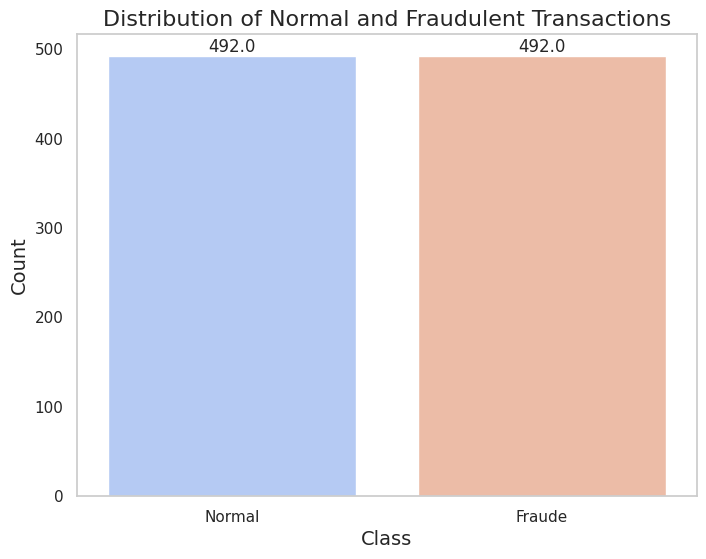

In [14]:
# Copy the balanced dataset and convert the 'Class' values to string labels
dados_tmp = dados_novos.copy()
dados_tmp['Class'] = dados_tmp['Class'].apply(fraude)

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a bar plot with customized colors
ax = sns.countplot(data=dados_tmp, x='Class', palette='coolwarm')

# Add labels and title
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Normal and Fraudulent Transactions', fontsize=16)

# Add the count numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)

# Customize grid and background
plt.grid(False)

# Show the plot
plt.show()

# Clean up the temporary dataframe
del dados_tmp

**- Creating a new count plot to assess and visually confirm the effectiveness of the data balancing process.**

This step involves generating a new count plot to evaluate whether the dataset has been successfully balanced between the normal and fraudulent transactions. By visualizing the class distributions, we can ensure that the number of instances in each class is equal, which is crucial for training a machine learning model that can accurately distinguish between the two classes. The count plot will provide a clear visual representation, allowing us to quickly verify that the balancing technique—whether through undersampling, oversampling, or another method—has been properly applied. This is an essential step before proceeding with model training, as it helps to mitigate the risk of the model being biased towards the majority class, thereby improving its performance on the minority class.

**- We will calculate the correlation matrix to identify variables that are more sensitive to fraudulent transactions. To accurately detect these relationships, it's essential to use the balanced dataset we have generated.**

Analyzing the correlation matrix allows us to uncover how different variables relate to each other and, more importantly, how they influence the likelihood of a transaction being fraudulent. By using the balanced dataset, we ensure that the analysis isn't skewed by the overrepresentation of non-fraudulent transactions, which could mask the significance of key variables associated with fraud. Additionally, we will compare this with the correlation matrix generated from the original unbalanced dataset. This comparison will highlight the challenges of identifying the most relevant variables when the data is heavily imbalanced. In the unbalanced case, the overwhelming presence of normal transactions makes it difficult to discern patterns related to fraud, thereby demonstrating the importance of data balancing for effective feature analysis.

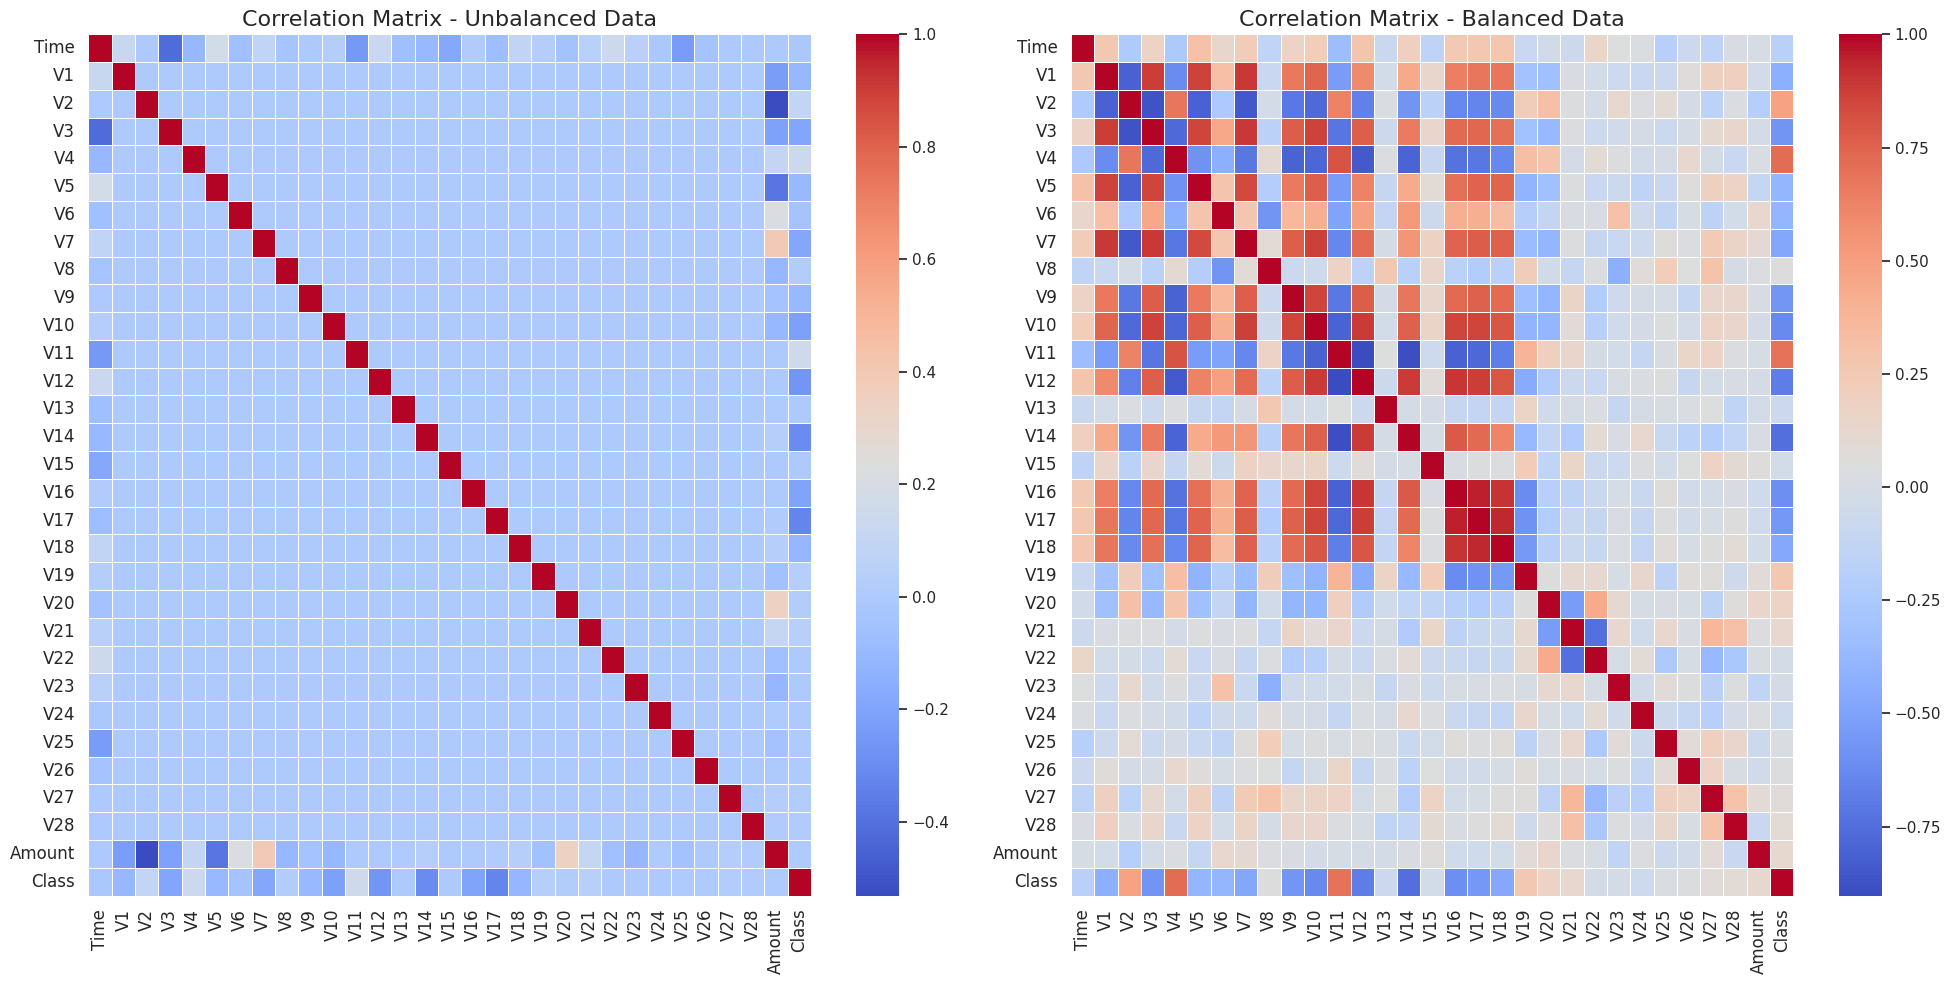

In [15]:
# Calculate the correlation matrix for both the unbalanced and balanced datasets
correlacao_desbalanceada = dados.corr()  # Correlation matrix for the unbalanced dataset
correlacao_balanceada = dados_novos.corr()  # Correlation matrix for the balanced dataset

# Set up the figure with two subplots
plt.figure(figsize=(20, 10))

# Plot the correlation matrix for the unbalanced dataset without annotations
plt.subplot(1, 2, 1)
sns.heatmap(correlacao_desbalanceada, annot=False, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix - Unbalanced Data", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot the correlation matrix for the balanced dataset without annotations
plt.subplot(1, 2, 2)
sns.heatmap(correlacao_balanceada, annot=False, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix - Balanced Data", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

- **In the unbalanced dataset, the variables appear to have little to no correlation with each other or the target variable, making it challenging to discern any meaningful patterns related to fraudulent transactions. However, in the balanced dataset, the correlations between variables and the target class become much clearer, indicating that balancing the data has revealed important relationships that were previously obscured.**

- **Notably, variables V3, V10, V12, and V14 exhibit strong negative correlations with the target class. This means that as the values of these variables decrease, the likelihood of the transaction being fraudulent increases. These features are crucial for identifying fraudulent transactions, as a more negative value in these variables is a strong indicator of fraud.**

- **On the other hand, variables V2, V4, and V11 show a positive correlation with the target class. In these cases, higher values of these features are associated with a greater likelihood of the transaction being fraudulent. These variables are equally important as they signal potential fraud when their values are elevated.**

- **The contrast between the unbalanced and balanced datasets highlights the importance of data preprocessing, particularly in cases where the target class is underrepresented. Without balancing, these critical correlations might remain hidden, leading to a model that underperforms in detecting fraud. By uncovering these relationships through balancing, we can build a model that more accurately identifies fraudulent transactions, leveraging the insights gained from these key variables.**

<Axes: xlabel='Class', ylabel='V14'>

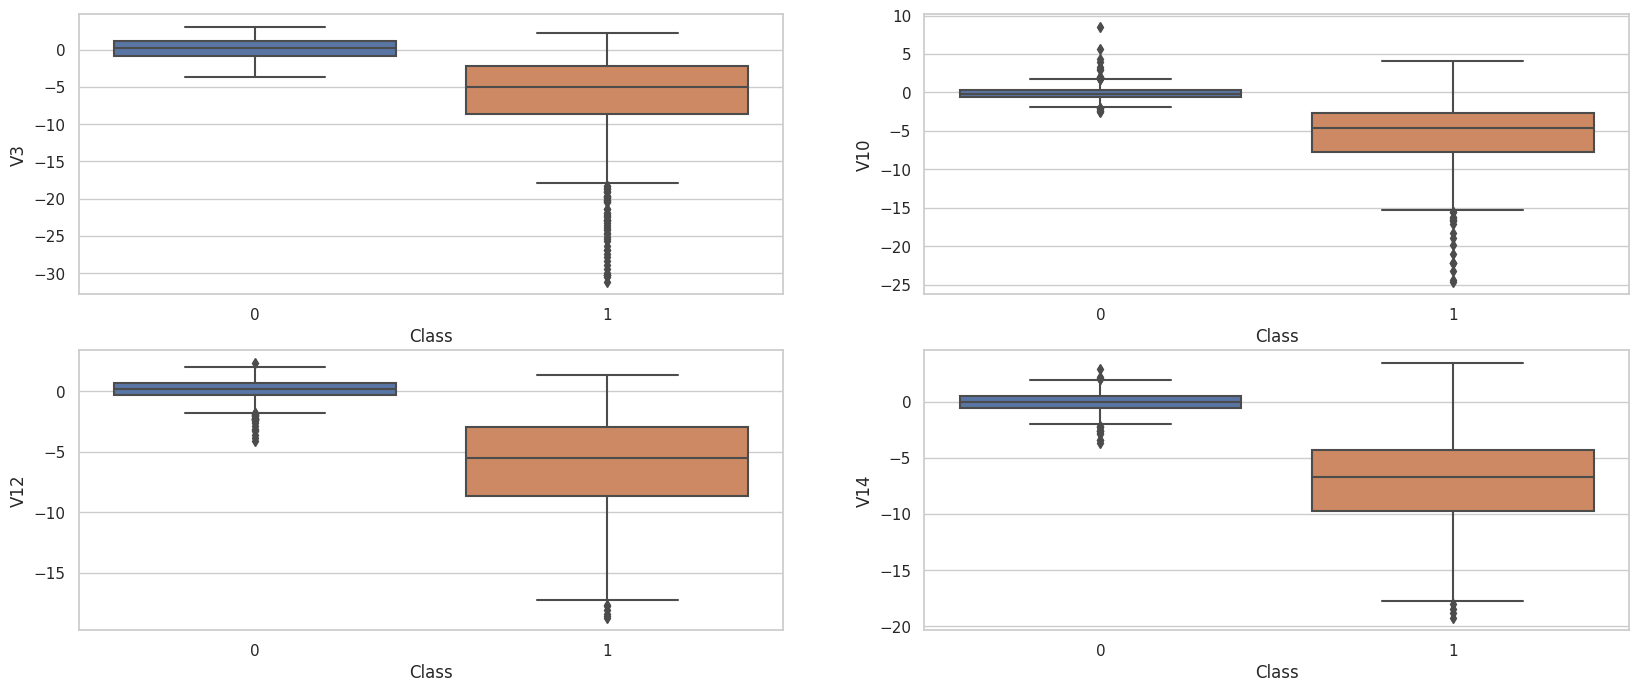

In [16]:
f, ax = plt.subplots(2,2, figsize=(20,8))

sns.boxplot(x="Class", y="V3", data=dados_novos,ax=ax[0][0])
sns.boxplot(x="Class", y="V10", data=dados_novos,ax=ax[0][1])
sns.boxplot(x="Class", y="V12", data=dados_novos,ax=ax[1][0])
sns.boxplot(x="Class", y="V14", data=dados_novos,ax=ax[1][1])

### Analysis of the Box Plots for Correlated Variables

The box plots you've provided illustrate the distribution of values for four key variables (V3, V10, V12, and V14) across two classes: non-fraudulent transactions (`Class 0`) and fraudulent transactions (`Class 1`). These variables were identified as having strong correlations with the target variable (`Class`) in the previous correlation matrix analysis. Here's a detailed analysis:

#### 1. **V3**
   - **Distribution in Non-Fraudulent Transactions (Class 0)**: The values of V3 in non-fraudulent transactions are tightly clustered around zero, with very little variation.
   - **Distribution in Fraudulent Transactions (Class 1)**: In contrast, the values of V3 in fraudulent transactions are spread out more negatively, with the median value significantly lower than that of non-fraudulent transactions.
   - **Interpretation**: The negative correlation observed in the correlation matrix is clearly reflected here. Lower values of V3 are strongly associated with fraudulent transactions, making this variable a key indicator for fraud detection.

#### 2. **V10**
   - **Distribution in Non-Fraudulent Transactions (Class 0)**: Similar to V3, the values of V10 for non-fraudulent transactions are centered around zero, with minimal deviation.
   - **Distribution in Fraudulent Transactions (Class 1)**: For fraudulent transactions, V10 exhibits a much broader range, skewing negatively with a lower median value compared to non-fraudulent transactions.
   - **Interpretation**: The box plot for V10 supports the negative correlation seen earlier. As V10 decreases, the likelihood of a transaction being fraudulent increases.

#### 3. **V12**
   - **Distribution in Non-Fraudulent Transactions (Class 0)**: V12 shows a compact distribution around zero for non-fraudulent transactions, with only a few outliers.
   - **Distribution in Fraudulent Transactions (Class 1)**: In fraudulent transactions, V12 has a wider distribution with more negative values, and a lower median.
   - **Interpretation**: The pattern of V12 closely follows that of V3 and V10, confirming that lower values of this variable are indicative of fraud.

#### 4. **V14**
   - **Distribution in Non-Fraudulent Transactions (Class 0)**: The values of V14 for non-fraudulent transactions are almost exclusively around zero, similar to the other variables.
   - **Distribution in Fraudulent Transactions (Class 1)**: For fraudulent transactions, V14 shows a wider distribution with a notable negative skew and a lower median.
   - **Interpretation**: V14 further reinforces the trend where more negative values are associated with fraudulent transactions.

### Overall Interpretation

- **Clear Separation**: The box plots demonstrate a clear separation between the distributions of these variables in fraudulent versus non-fraudulent transactions. The non-fraudulent transactions consistently show values close to zero, while fraudulent transactions are associated with significantly lower (more negative) values.

- **Importance of Negative Correlations**: These variables—V3, V10, V12, and V14—are crucial in identifying fraudulent transactions due to their strong negative correlations with the target class. The more negative these values are, the more likely the transaction is to be fraudulent.

- **Modeling Implications**: These insights are invaluable for fraud detection models. By focusing on these variables, the model can be trained to recognize the patterns associated with fraudulent activity, leading to better prediction accuracy.

This analysis further validates the findings from the correlation matrices and highlights the importance of these variables in distinguishing between normal and fraudulent transactions.

<Axes: xlabel='Class', ylabel='V11'>

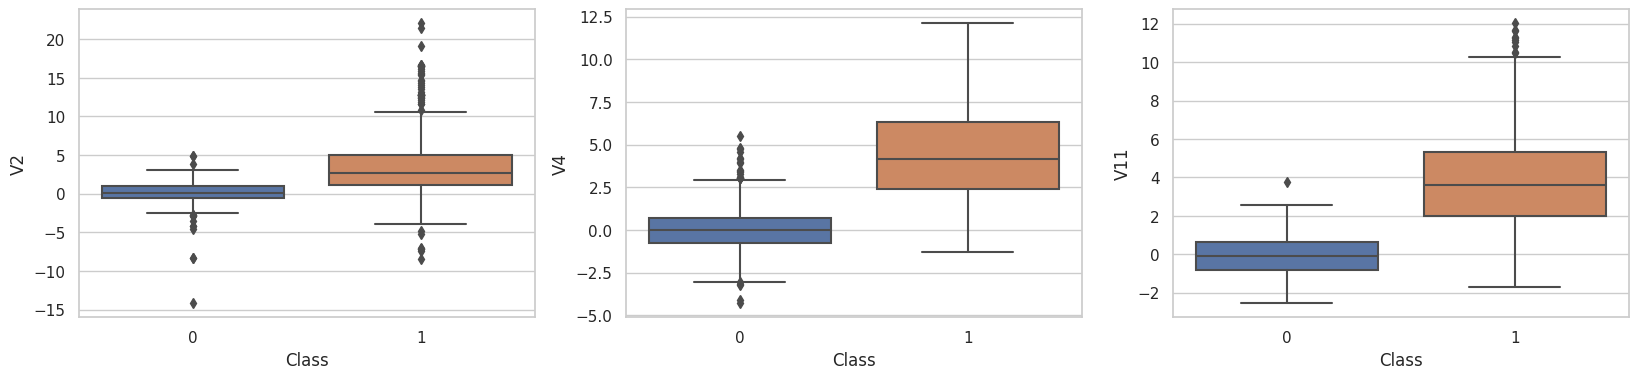

In [17]:
f, ax = plt.subplots(1,3, figsize=(20,4))

sns.boxplot(x="Class", y="V2", data=dados_novos,ax=ax[0])
sns.boxplot(x="Class", y="V4", data=dados_novos,ax=ax[1])
sns.boxplot(x="Class", y="V11", data=dados_novos,ax=ax[2])

### Analysis of the Box Plots for Positively Correlated Variables

The box plots shown here illustrate the distribution of values for three variables (V2, V4, and V11) across two classes: non-fraudulent transactions (`Class 0`) and fraudulent transactions (`Class 1`). These variables were identified as having strong positive correlations with the target variable (`Class`). Here's a detailed analysis:

#### 1. **V2**
   - **Distribution in Non-Fraudulent Transactions (Class 0)**: The values of V2 in non-fraudulent transactions are centered around zero, with a relatively tight distribution and a few outliers on the lower end.
   - **Distribution in Fraudulent Transactions (Class 1)**: For fraudulent transactions, the values of V2 are generally higher, with the median value significantly greater than that of non-fraudulent transactions. The distribution also shows a wider spread with more extreme positive values.
   - **Interpretation**: The positive correlation observed for V2 means that as the value of V2 increases, the likelihood of the transaction being fraudulent also increases. This makes V2 a key indicator for detecting fraud.

#### 2. **V4**
   - **Distribution in Non-Fraudulent Transactions (Class 0)**: The values of V4 for non-fraudulent transactions are mostly centered around zero, with minimal variation.
   - **Distribution in Fraudulent Transactions (Class 1)**: In contrast, the values of V4 for fraudulent transactions are significantly higher, with a broader range and a much higher median.
   - **Interpretation**: The box plot for V4 reinforces the positive correlation seen in the correlation matrix. Higher values of V4 are indicative of a higher likelihood of fraud.

#### 3. **V11**
   - **Distribution in Non-Fraudulent Transactions (Class 0)**: V11 values for non-fraudulent transactions are closely packed around zero, with very little deviation.
   - **Distribution in Fraudulent Transactions (Class 1)**: Fraudulent transactions exhibit higher values of V11, with a distribution that is clearly shifted upwards compared to non-fraudulent transactions.
   - **Interpretation**: Similar to V2 and V4, V11 shows that higher values are associated with fraudulent transactions, making it an important feature for distinguishing between fraudulent and non-fraudulent activities.

### Overall Interpretation

- **Clear Separation**: The box plots show a clear distinction between the distributions of these variables in fraudulent versus non-fraudulent transactions. The non-fraudulent transactions typically exhibit values close to zero, while fraudulent transactions tend to have significantly higher values.

- **Importance of Positive Correlations**: These variables—V2, V4, and V11—are crucial for identifying fraudulent transactions due to their strong positive correlations with the target class. Higher values in these variables increase the probability of a transaction being fraudulent.

- **Modeling Implications**: These insights emphasize the importance of including these positively correlated variables in fraud detection models. By focusing on these features, the model can be trained to better identify patterns associated with fraudulent transactions, ultimately improving prediction accuracy.

This analysis complements the previous findings on negatively correlated variables, providing a comprehensive understanding of the factors that influence the likelihood of fraud in the dataset. Together, these analyses help to build a robust fraud detection model that leverages the strengths of both positively and negatively correlated features.

**- From the box plots, we observe a significant presence of outliers across all the variables. These outliers can potentially distort the performance of classification models by introducing noise and bias into the training process. Therefore, we will conduct a thorough analysis of these outliers to understand their impact better and, where necessary, proceed with their removal to ensure the robustness and accuracy of our models.**

This version provides a more detailed explanation of the potential issues caused by outliers and emphasizes the importance of careful analysis before taking action. It also highlights the goal of ensuring that the classification models remain robust and accurate.

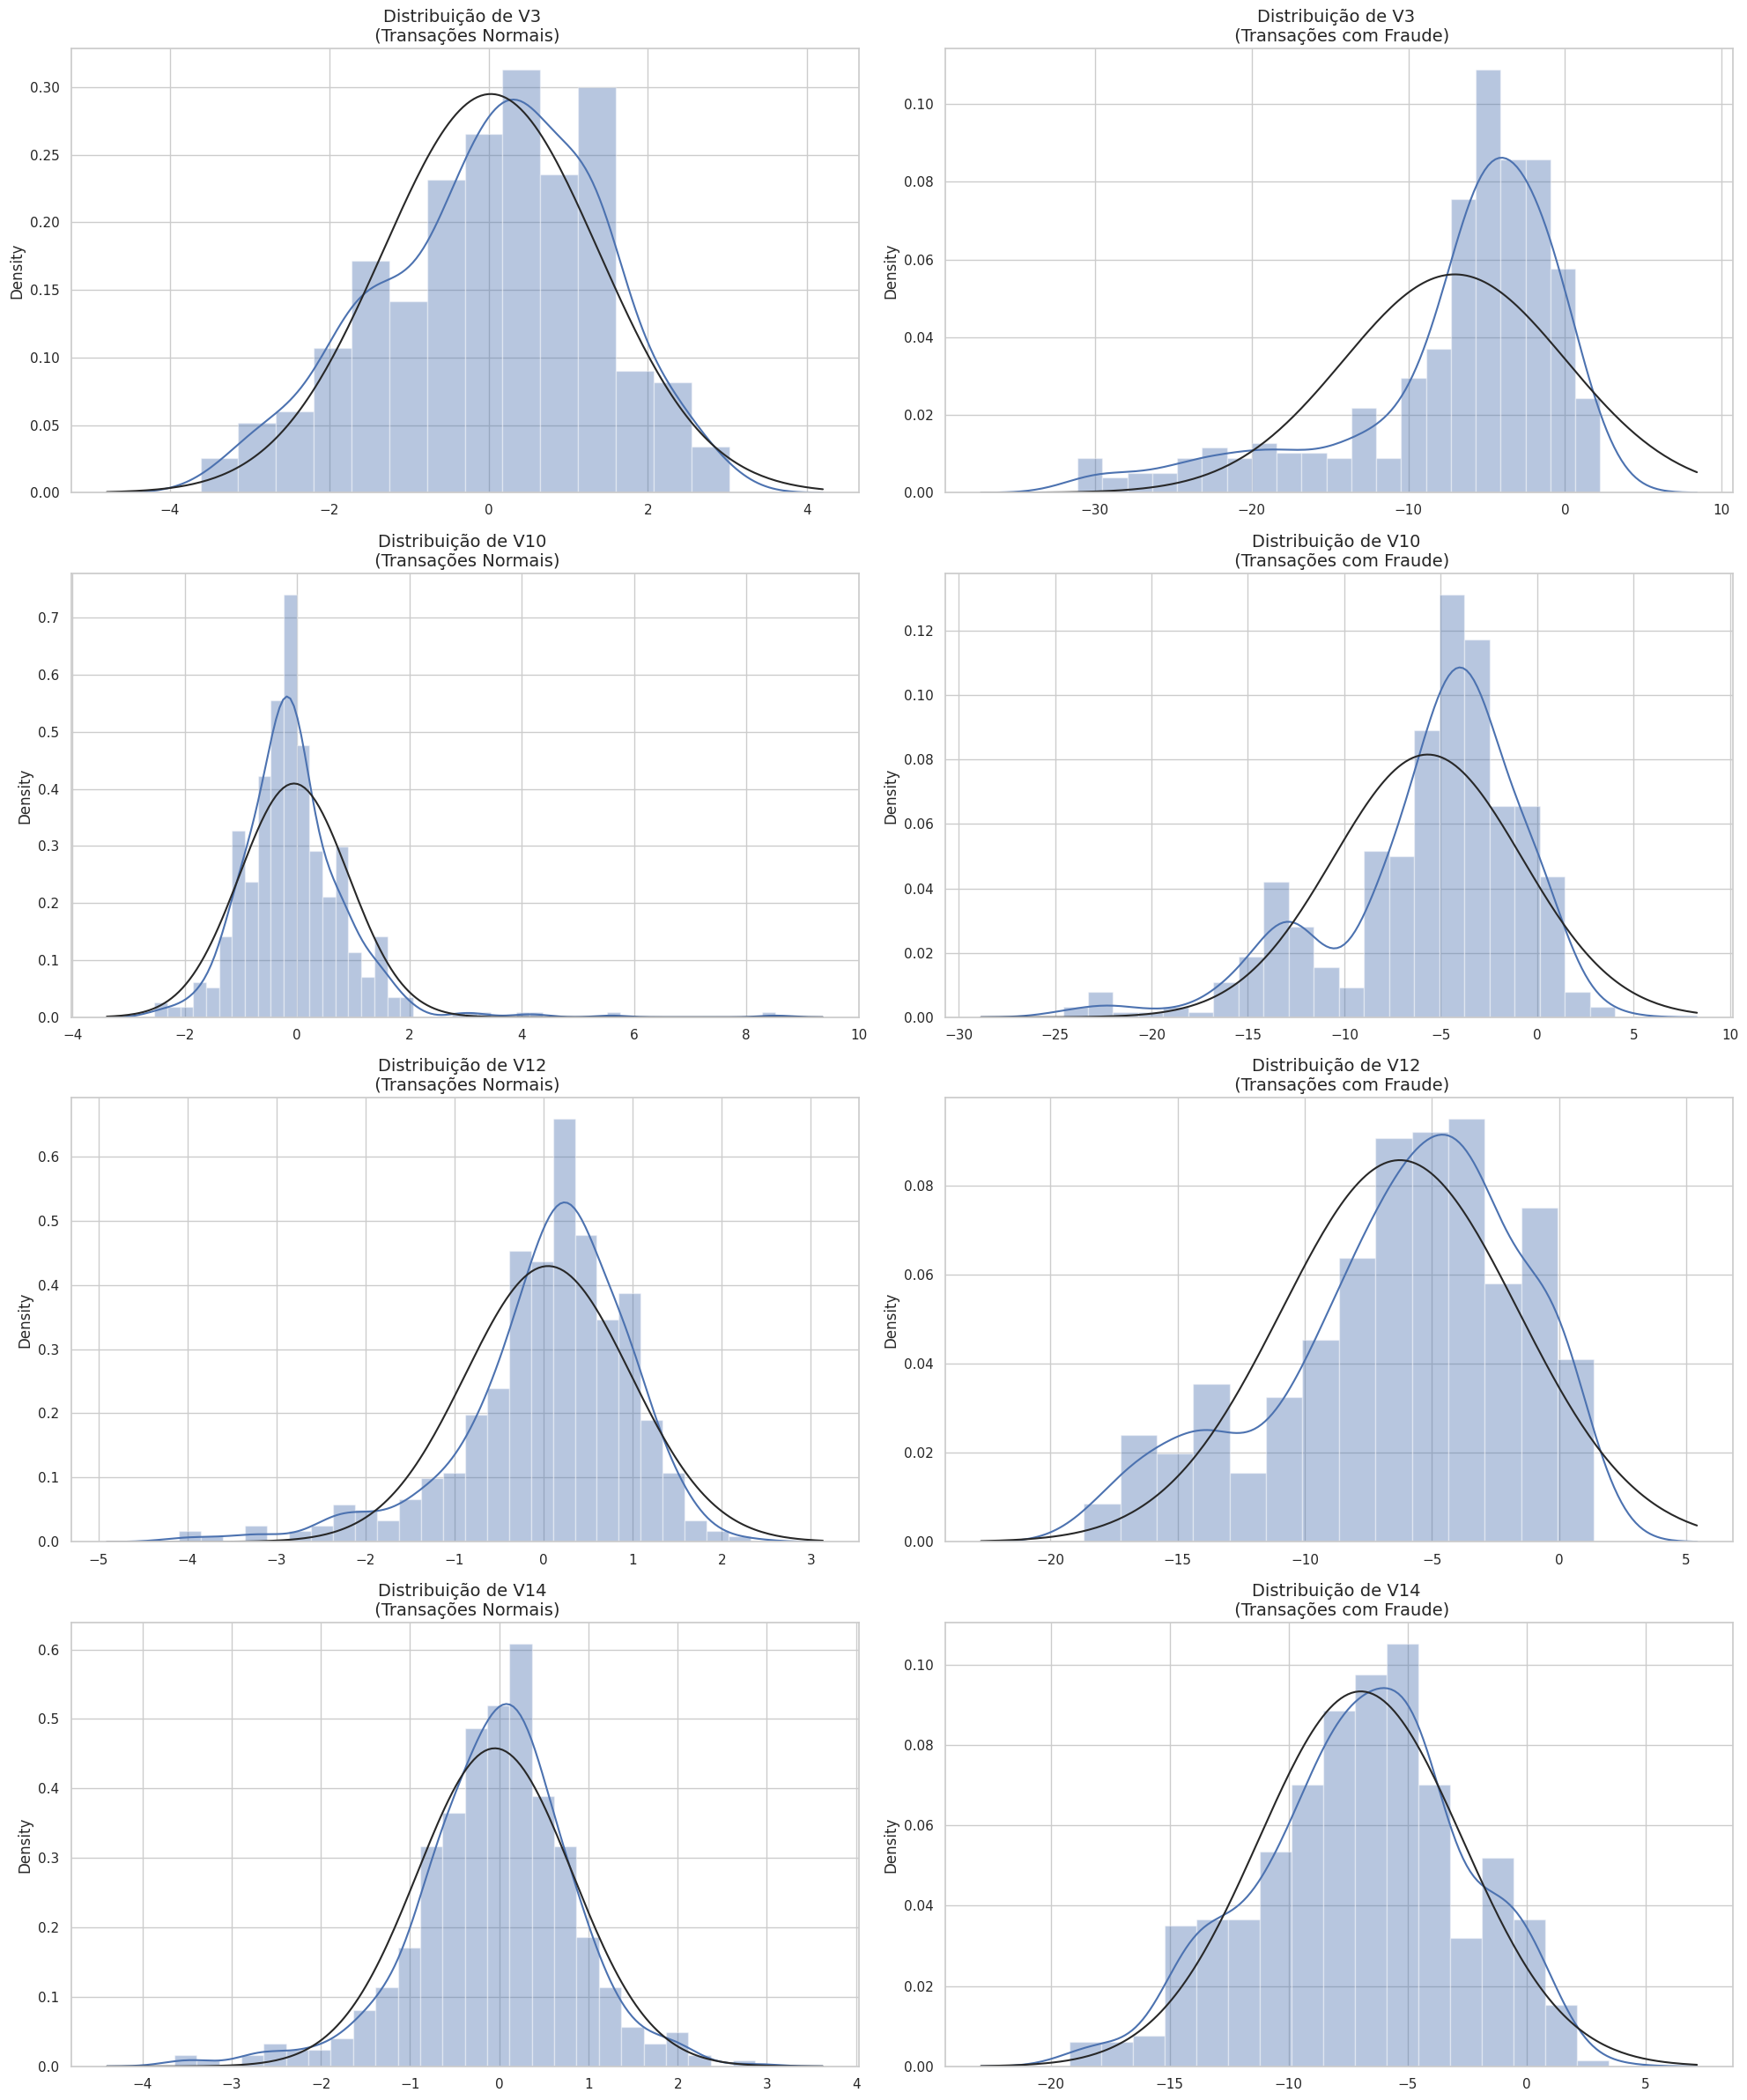

In [18]:
from scipy.stats import norm

# Create a figure with 4x2 subplots
f, ax = plt.subplots(4, 2, figsize=(20, 24))

# Plot distributions for V3
sns.distplot(dados_novos['V3'].loc[dados_novos['Class'] == 0].values, ax=ax[0][0], fit=norm)
ax[0][0].set_title('Distribuição de V3 \n (Transações Normais)', fontsize=14)
sns.distplot(dados_novos['V3'].loc[dados_novos['Class'] == 1].values, ax=ax[0][1], fit=norm)
ax[0][1].set_title('Distribuição de V3 \n (Transações com Fraude)', fontsize=14)

# Plot distributions for V10
sns.distplot(dados_novos['V10'].loc[dados_novos['Class'] == 0].values, ax=ax[1][0], fit=norm)
ax[1][0].set_title('Distribuição de V10 \n (Transações Normais)', fontsize=14)
sns.distplot(dados_novos['V10'].loc[dados_novos['Class'] == 1].values, ax=ax[1][1], fit=norm)
ax[1][1].set_title('Distribuição de V10 \n (Transações com Fraude)', fontsize=14)

# Plot distributions for V12
sns.distplot(dados_novos['V12'].loc[dados_novos['Class'] == 0].values, ax=ax[2][0], fit=norm)
ax[2][0].set_title('Distribuição de V12 \n (Transações Normais)', fontsize=14)
sns.distplot(dados_novos['V12'].loc[dados_novos['Class'] == 1].values, ax=ax[2][1], fit=norm)
ax[2][1].set_title('Distribuição de V12 \n (Transações com Fraude)', fontsize=14)

# Plot distributions for V14
sns.distplot(dados_novos['V14'].loc[dados_novos['Class'] == 0].values, ax=ax[3][0], fit=norm)
ax[3][0].set_title('Distribuição de V14 \n (Transações Normais)', fontsize=14)
sns.distplot(dados_novos['V14'].loc[dados_novos['Class'] == 1].values, ax=ax[3][1], fit=norm)
ax[3][1].set_title('Distribuição de V14 \n (Transações com Fraude)', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**- When comparing the samples of fraudulent and non-fraudulent transactions, we observe distinct differences in the distribution of certain variables. Specifically, for fraudulent transactions, the variable V3 exhibits a distribution that is noticeably more negative compared to non-fraudulent cases, where the values are more centered around zero. This negative shift in V3 is a strong indicator of fraudulent activity.**

**- Similarly, the variable V10 shows a distribution that is tightly centered around zero for non-fraudulent transactions, but shifts towards more negative values in the presence of fraud. This pattern is consistent with what we observed for V3. Variables V12 and V14 follow a similar trend to V10, where their distributions are more negative for fraudulent transactions compared to non-fraudulent ones. This consistent shift across multiple variables suggests that these features are highly sensitive to fraudulent activity and are therefore critical for detecting fraud.**

**- To further enhance the model's ability to identify fraudulent transactions, we will proceed with the removal of outliers from these key variables (V3, V10, V12, and V14). Outliers can introduce noise and reduce the accuracy of the model, so their removal is expected to improve model performance. The interquartile range (IQR) method will be used to identify and eliminate these outliers. The IQR is calculated as the difference between the third quartile (Q3) and the first quartile (Q1) of the data. Any data points that fall below Q1 or above Q3 by more than 1.5 times the IQR will be considered outliers and will be removed from the dataset. By doing so, we aim to refine the dataset and provide the model with cleaner, more reliable data, ultimately leading to more accurate and efficient fraud detection.**

# Part 4 - Outlier analysis

In [19]:
# Identify and remove outliers from the dataset for variables V3, V10, V12, and V14 in fraudulent transactions

# 1. Process for Variable V3
# Extract the values of V3 for fraudulent transactions
v3_fraude = dados_novos['V3'].loc[dados_novos['Class'] == 1].values

# Calculate the 25th and 75th percentiles (Q1 and Q3) for V3
q25, q75 = np.percentile(v3_fraude, 25), np.percentile(v3_fraude, 75)

# Compute the Interquartile Range (IQR) for V3
v3_iqr = q75 - q25

# Define the cutoff for identifying outliers, using 1.5 times the IQR
v3_cut_off = v3_iqr * 1.5
v3_inferior, v3_superior = q25 - v3_cut_off, q75 + v3_cut_off

# Identify the outliers in V3 based on the calculated cutoff
outliers = [x for x in v3_fraude if x < v3_inferior or x > v3_superior]

# Remove the outliers from the dataset for V3
dados_novos = dados_novos.drop(dados_novos[(dados_novos['V3'] > v3_superior) | (dados_novos['V3'] < v3_inferior)].index)

# 2. Process for Variable V10 (same steps as above)
v10_fraude = dados_novos['V10'].loc[dados_novos['Class'] == 1].values
q25, q75 = np.percentile(v10_fraude, 25), np.percentile(v10_fraude, 75)
v10_iqr = q75 - q25
v10_cut_off = v10_iqr * 1.5
v10_inferior, v10_superior = q25 - v10_cut_off, q75 + v10_cut_off
outliers = [x for x in v10_fraude if x < v10_inferior or x > v10_superior]
dados_novos = dados_novos.drop(dados_novos[(dados_novos['V10'] > v10_superior) | (dados_novos['V10'] < v10_inferior)].index)

# 3. Process for Variable V12 (same steps as above)
v12_fraude = dados_novos['V12'].loc[dados_novos['Class'] == 1].values
q25, q75 = np.percentile(v12_fraude, 25), np.percentile(v12_fraude, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr * 1.5
v12_inferior, v12_superior = q25 - v12_cut_off, q75 + v12_cut_off
outliers = [x for x in v12_fraude if x < v12_inferior or x > v12_superior]
dados_novos = dados_novos.drop(dados_novos[(dados_novos['V12'] > v12_superior) | (dados_novos['V12'] < v12_inferior)].index)

# 4. Process for Variable V14 (same steps as above)
v14_fraude = dados_novos['V14'].loc[dados_novos['Class'] == 1].values
q25, q75 = np.percentile(v14_fraude, 25), np.percentile(v14_fraude, 75)
v14_iqr = q75 - q25
v14_cut_off = v14_iqr * 1.5
v14_inferior, v14_superior = q25 - v14_cut_off, q75 + v14_cut_off
outliers = [x for x in v14_fraude if x < v14_inferior or x > v14_superior]
dados_novos = dados_novos.drop(dados_novos[(dados_novos['V14'] > v14_superior) | (dados_novos['V14'] < v14_inferior)].index)

# Display the first few rows of the updated dataset
dados_novos.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
192821,0.530681,-0.674775,-0.441958,0.667083,-2.084165,0.626391,-0.270450,0.078464,0.114955,-0.216016,...,-0.175818,-0.373447,-0.200255,-1.073182,0.236477,-0.335786,0.330642,0.184058,-0.035772,0
107637,-0.166308,-2.271755,-0.457655,-2.589055,2.230778,-4.278983,0.388610,0.102485,0.813128,-1.092921,...,1.096342,0.658399,1.711676,0.333540,0.538591,-0.193529,0.258194,0.247269,11.218193,1
224799,0.696366,2.011952,0.066540,-1.619597,0.340741,0.369629,-0.587001,0.033295,-0.043517,0.304044,...,-0.302170,-0.820349,0.363522,0.595144,-0.345408,0.150194,-0.066543,-0.040715,-0.294977,0
42007,-0.514268,-3.140260,3.367342,-2.778931,3.859701,-1.159518,-0.721552,-4.195342,-0.598346,-2.870145,...,2.452339,-0.292963,-0.189330,-0.166482,0.038040,-0.015477,0.776691,0.397557,-0.296793,1
189878,0.515784,-5.313774,2.664274,-4.250707,0.394707,-0.391383,0.683526,-5.133671,-7.907790,0.215475,...,8.664662,-2.716383,0.483559,0.079235,0.311065,0.555544,0.176740,0.362907,-0.293440,1


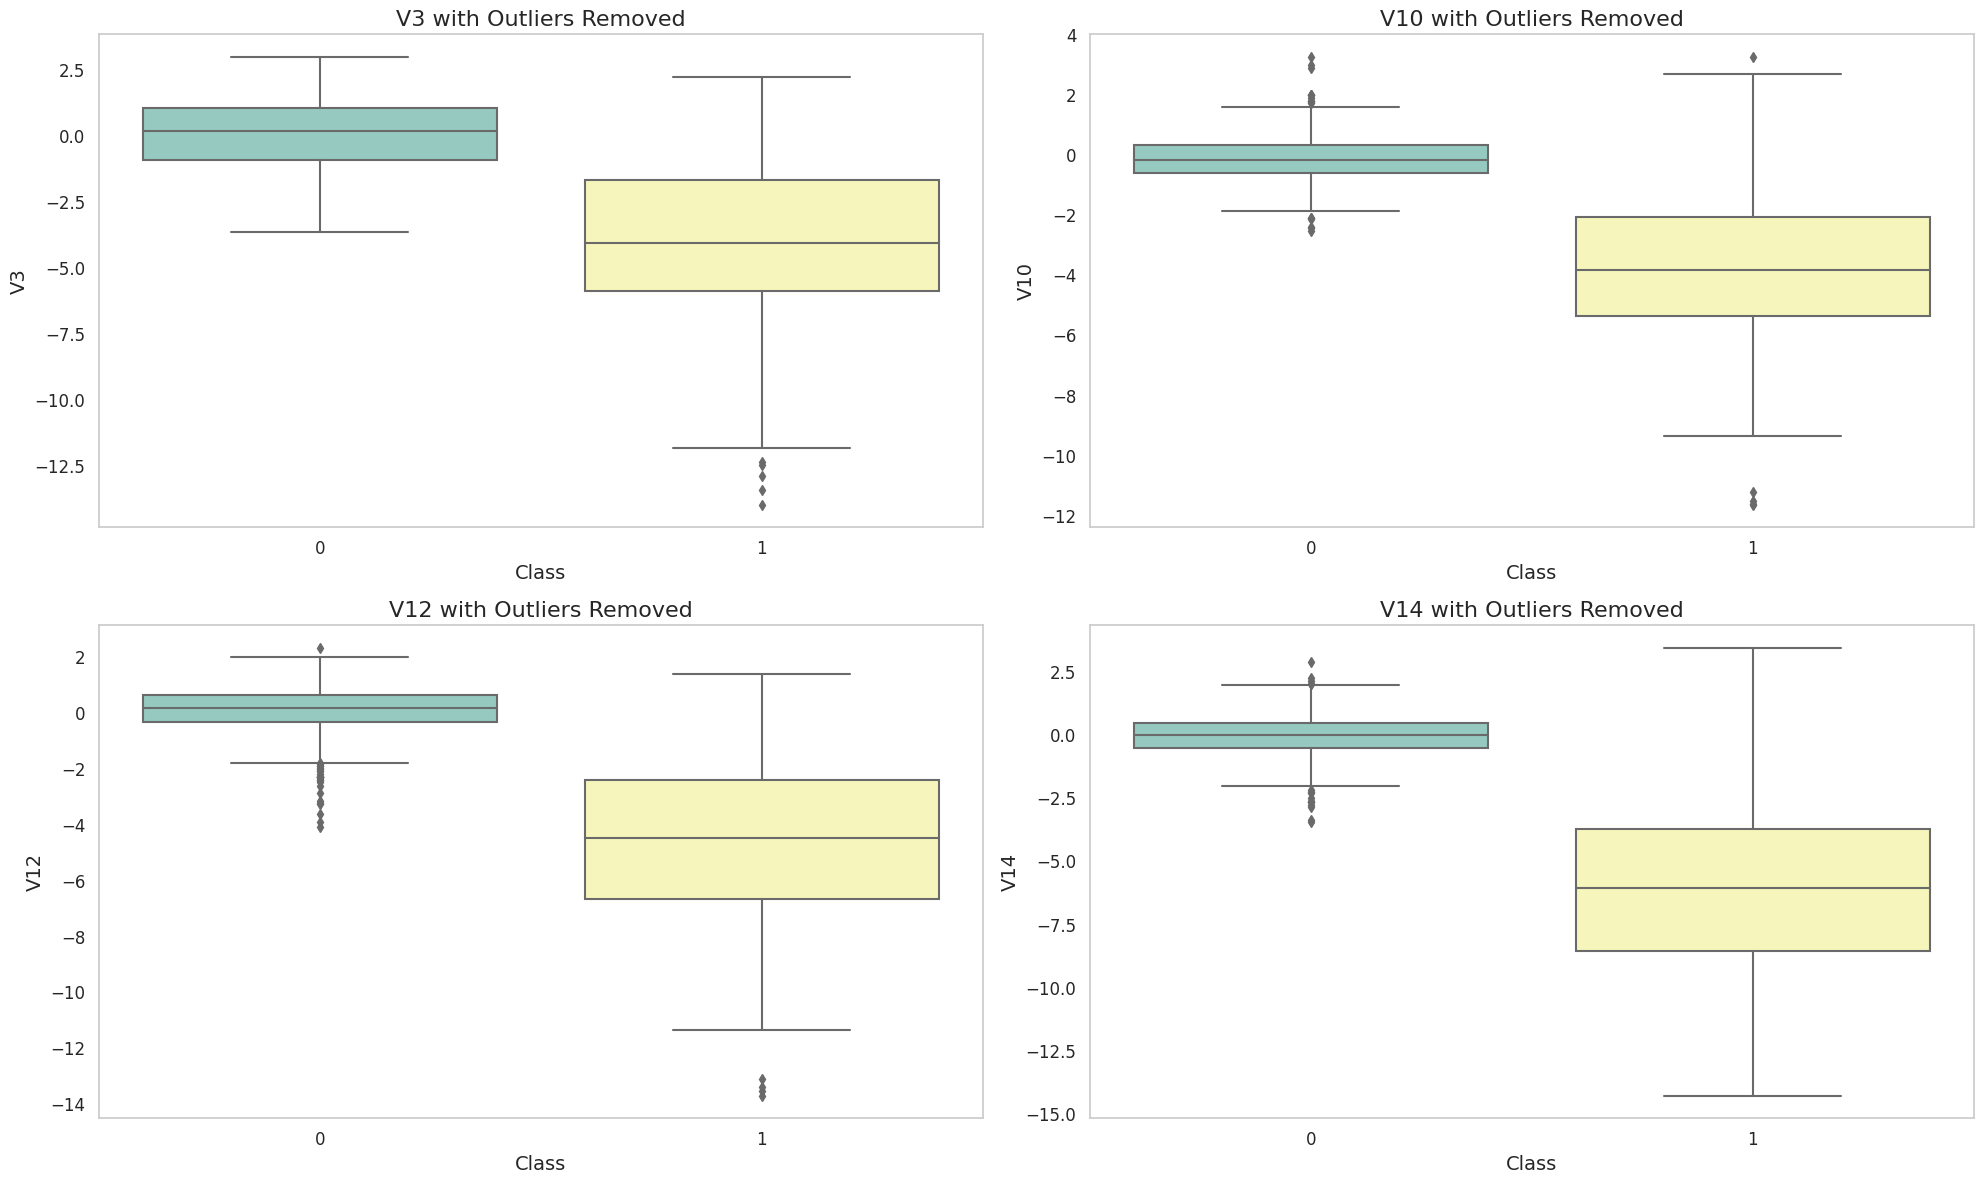

In [20]:
f, ax = plt.subplots(2, 2, figsize=(20, 12))

# Box plot for V3
sns.boxplot(x="Class", y="V3", data=dados_novos, ax=ax[0][0], palette="Set3")
ax[0][0].set_title("V3 with Outliers Removed", fontsize=16)
ax[0][0].set_xlabel("Class", fontsize=14)
ax[0][0].set_ylabel("V3", fontsize=14)
ax[0][0].tick_params(axis='both', which='major', labelsize=12)
ax[0][0].grid(False)

# Box plot for V10
sns.boxplot(x="Class", y="V10", data=dados_novos, ax=ax[0][1], palette="Set3")
ax[0][1].set_title("V10 with Outliers Removed", fontsize=16)
ax[0][1].set_xlabel("Class", fontsize=14)
ax[0][1].set_ylabel("V10", fontsize=14)
ax[0][1].tick_params(axis='both', which='major', labelsize=12)
ax[0][1].grid(False)

# Box plot for V12
sns.boxplot(x="Class", y="V12", data=dados_novos, ax=ax[1][0], palette="Set3")
ax[1][0].set_title("V12 with Outliers Removed", fontsize=16)
ax[1][0].set_xlabel("Class", fontsize=14)
ax[1][0].set_ylabel("V12", fontsize=14)
ax[1][0].tick_params(axis='both', which='major', labelsize=12)
ax[1][0].grid(False)

# Box plot for V14
sns.boxplot(x="Class", y="V14", data=dados_novos, ax=ax[1][1], palette="Set3")
ax[1][1].set_title("V14 with Outliers Removed", fontsize=16)
ax[1][1].set_xlabel("Class", fontsize=14)
ax[1][1].set_ylabel("V14", fontsize=14)
ax[1][1].tick_params(axis='both', which='major', labelsize=12)
ax[1][1].grid(False)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

**- We are generating a new set of boxplots to verify if the outliers have been effectively removed from the dataset. This step is crucial to ensure that the data is cleaned and ready for accurate model training.**

**- Upon examining the updated boxplots, we observe that while some outliers still remain, their numbers have been significantly reduced. The remaining outliers are less extreme, with maximum and minimum values that are much more aligned with the general distribution of the data. This suggests that the process of outlier removal has successfully mitigated the impact of extreme values, which should lead to more robust and reliable modeling outcomes.**

**- The presence of these remaining outliers, though smaller in number, indicates that the data still retains some variability, which is natural and expected in real-world datasets. These refined distributions now offer a better balance between capturing the true nature of the data and minimizing the noise that outliers can introduce, ultimately enhancing the performance of the fraud detection model.**

This version provides a more thorough explanation of the significance of the boxplots, the impact of the remaining outliers, and the benefits of the outlier removal process for improving model accuracy and reliability. It also highlights the natural variability that exists in real-world data, offering a balanced perspective on the results.

## Part 5 - Unsupervised Learning with t SNE, PCA, SVD

In [21]:
# Separating Features and Target Variable

# Extract the feature matrix (X) by dropping the 'Class' column from the dataset
# 'Class' is the target variable, which indicates whether a transaction is fraudulent or not
# The remaining columns in the dataset are the features used for prediction
X = dados_novos.drop('Class', axis=1).values

# Extract the target variable (Y) which represents the class labels
# 'Y' contains the values of the 'Class' column, where typically 0 indicates non-fraudulent transactions and 1 indicates fraudulent transactions
Y = dados_novos['Class'].values

In [22]:
# Import necessary libraries for dimensionality reduction and visualization
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

# Dimensionality Reduction with t-SNE
# Apply t-SNE to reduce the feature space to 2 dimensions for visualization purposes
# t-SNE is particularly useful for visualizing high-dimensional data
X_reduzido_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

# Dimensionality Reduction with PCA
# Apply PCA to reduce the feature space to 2 dimensions
# PCA is a linear dimensionality reduction technique that identifies the axes of maximum variance in the data
X_reduzido_pca = PCA(n_components=2, random_state=42).fit_transform(X)

# Dimensionality Reduction with Truncated SVD
# Apply Truncated SVD (also known as LSA in the context of text data) to reduce the feature space to 2 dimensions
# Truncated SVD is a linear dimensionality reduction technique that works well with sparse data matrices
X_reduzido_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X)

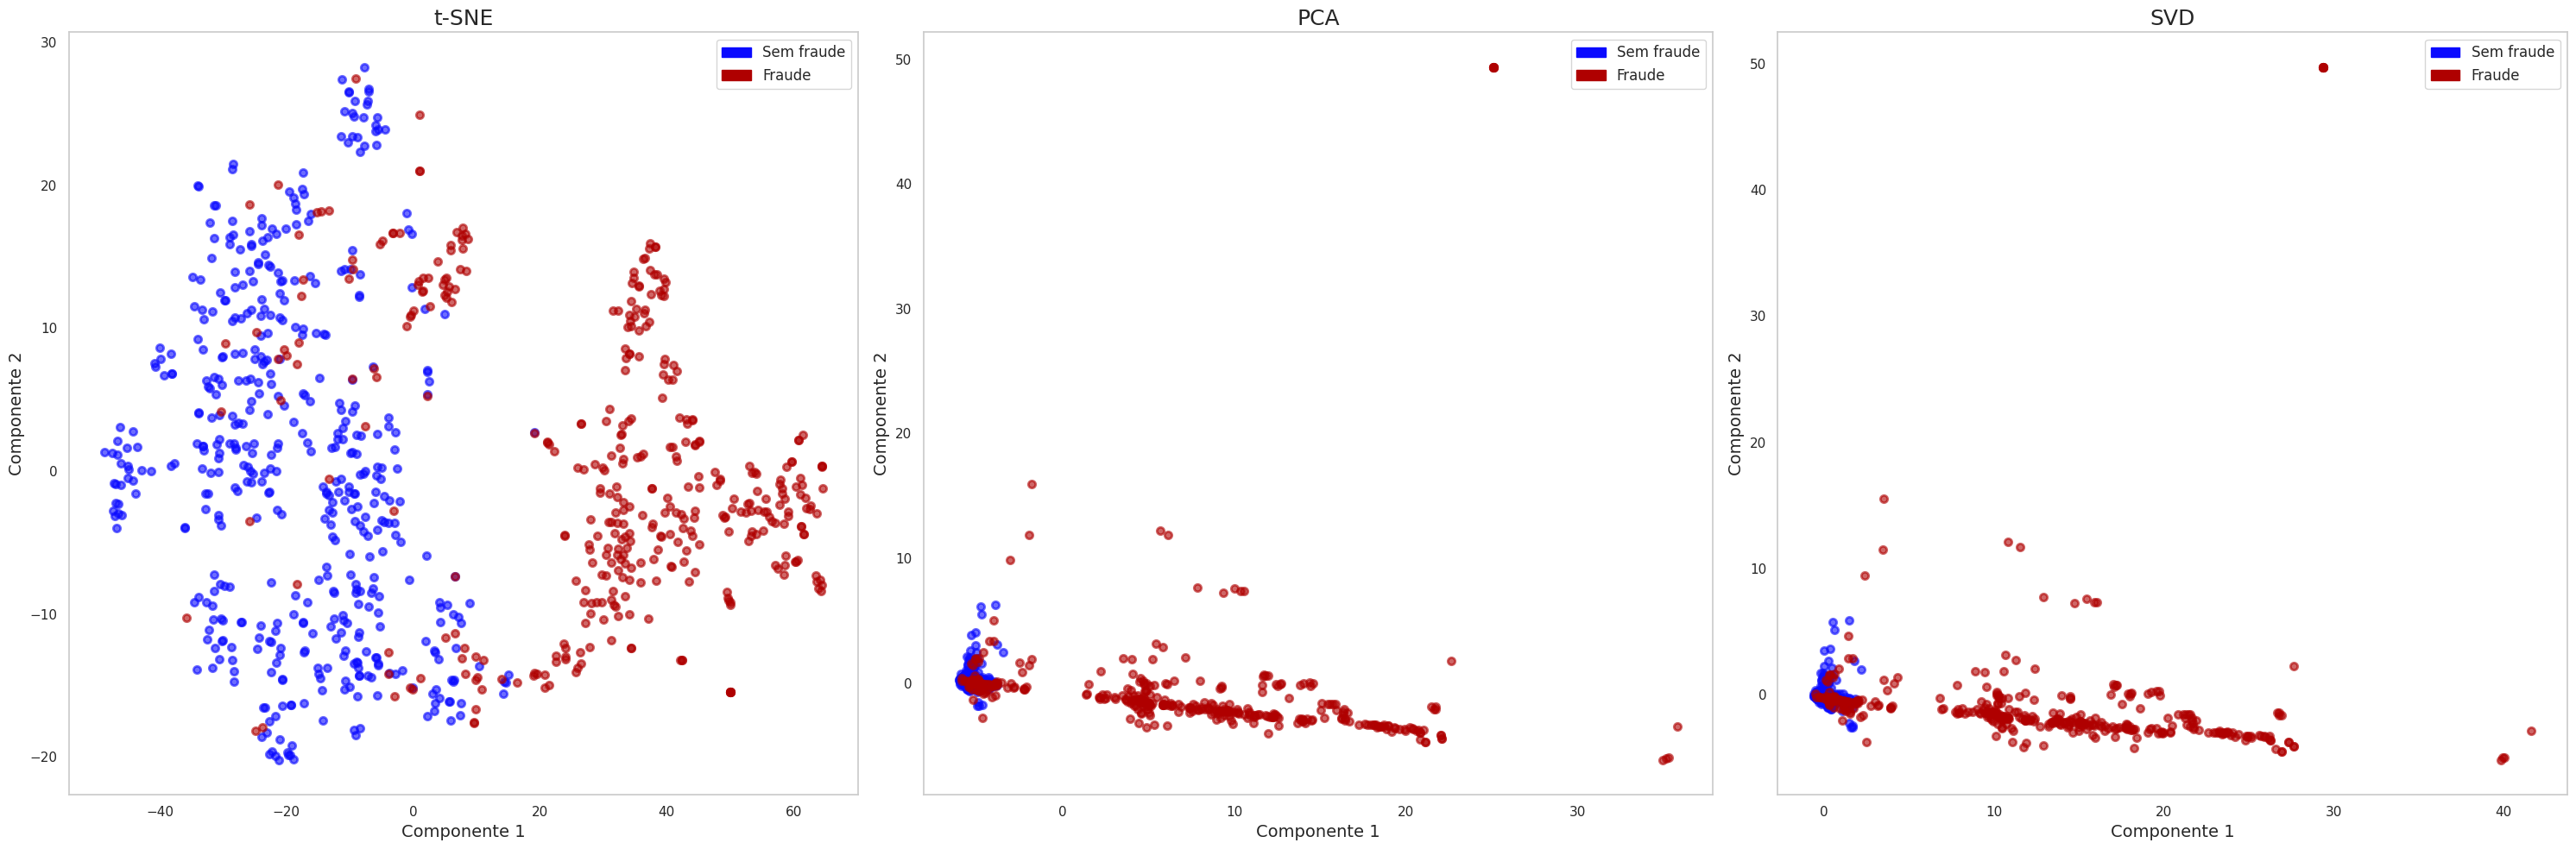

In [23]:
# Custom color patches for legend
azul = mpatches.Patch(color='#0A0AFF', label='Sem fraude')
vermelho = mpatches.Patch(color='#AF0000', label='Fraude')

# Create subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))

# Plot for t-SNE
ax1.scatter(X_reduzido_tsne[Y == 0, 0], X_reduzido_tsne[Y == 0, 1], c='#0A0AFF', label='Sem fraude', alpha=0.6, linewidths=2)
ax1.scatter(X_reduzido_tsne[Y == 1, 0], X_reduzido_tsne[Y == 1, 1], c='#AF0000', label='Fraude', alpha=0.6, linewidths=2)
ax1.set_title('t-SNE', fontsize=18)
ax1.set_xlabel('Componente 1', fontsize=14)
ax1.set_ylabel('Componente 2', fontsize=14)
ax1.grid(False)
ax1.legend(handles=[azul, vermelho], fontsize=12)

# Plot for PCA
ax2.scatter(X_reduzido_pca[Y == 0, 0], X_reduzido_pca[Y == 0, 1], c='#0A0AFF', label='Sem fraude', alpha=0.6, linewidths=2)
ax2.scatter(X_reduzido_pca[Y == 1, 0], X_reduzido_pca[Y == 1, 1], c='#AF0000', label='Fraude', alpha=0.6, linewidths=2)
ax2.set_title('PCA', fontsize=18)
ax2.set_xlabel('Componente 1', fontsize=14)
ax2.set_ylabel('Componente 2', fontsize=14)
ax2.grid(False)
ax2.legend(handles=[azul, vermelho], fontsize=12)

# Plot for SVD
ax3.scatter(X_reduzido_svd[Y == 0, 0], X_reduzido_svd[Y == 0, 1], c='#0A0AFF', label='Sem fraude', alpha=0.6, linewidths=2)
ax3.scatter(X_reduzido_svd[Y == 1, 0], X_reduzido_svd[Y == 1, 1], c='#AF0000', label='Fraude', alpha=0.6, linewidths=2)
ax3.set_title('SVD', fontsize=18)
ax3.set_xlabel('Componente 1', fontsize=14)
ax3.set_ylabel('Componente 2', fontsize=14)
ax3.grid(False)
ax3.legend(handles=[azul, vermelho], fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Explanation of the Visualization Results:

The visualization shows the results of three different dimensionality reduction techniques—t-SNE, PCA, and SVD—applied to a dataset of transactions, where the goal is to distinguish between fraudulent and non-fraudulent transactions. Here’s a breakdown of the results for each technique:

#### 1. **t-SNE (t-distributed Stochastic Neighbor Embedding)**:
   
   - **Interpretation**: t-SNE has successfully separated the fraudulent transactions (in red) from the non-fraudulent transactions (in blue) in the reduced 2D space. The plot shows a clear distinction between the two classes, which indicates that t-SNE was able to capture the complex, non-linear relationships in the data.
   
   - **Observation**: The clustering effect observed suggests that t-SNE is effective in highlighting the inherent structure of the data, making it a powerful tool for visualizing high-dimensional data.

#### 2. **PCA (Principal Component Analysis)**:
   
   - **Interpretation**: PCA has not provided a clear separation between the fraudulent and non-fraudulent transactions. Most of the data points are clustered together, making it difficult to distinguish between the two classes in the reduced 2D space.
   
   - **Observation**: PCA is a linear dimensionality reduction technique, and the lack of separation suggests that the relationships in the data may be non-linear. This might explain why PCA is less effective in this context compared to t-SNE.

#### 3. **SVD (Truncated Singular Value Decomposition)**:
   
   - **Interpretation**: Similar to PCA, SVD has not been able to separate the fraudulent transactions from the non-fraudulent ones effectively. The points are densely packed with no clear distinction between the two classes.
   
   - **Observation**: SVD, like PCA, is a linear technique, and its limited effectiveness here suggests that the data's underlying structure may require non-linear techniques for better separation.

### Overall Conclusion:

- **Effectiveness of t-SNE**: t-SNE has shown itself to be the most effective of the three techniques in separating the fraudulent transactions from the non-fraudulent ones. This suggests that the relationships in the data are likely non-linear, and t-SNE’s ability to capture these non-linearities makes it a valuable tool for this type of data.

- **Limitations of PCA and SVD**: Both PCA and SVD, which are linear dimensionality reduction techniques, struggled to provide meaningful separation between the two classes. This highlights the importance of selecting the appropriate dimensionality reduction technique based on the data's characteristics.

- **Next Steps**: Given the results, it may be beneficial to explore other non-linear techniques or further tune the parameters of t-SNE to see if even better separation can be achieved. Additionally, understanding why PCA and SVD failed to separate the classes could provide insights into the nature of the data.

This visualization underscores the importance of using the right tools for the data at hand and shows how different techniques can yield vastly different insights from the same dataset.

**- From the clusters observed in the t-SNE plot, we can see that there is a noticeable separation between the different types of transactions, particularly between fraudulent and non-fraudulent ones. This separation suggests that the features in the dataset do capture the underlying differences between these two classes.**

**- The distinct clusters in the t-SNE visualization indicate that the algorithm effectively identified patterns that differentiate fraud from normal transactions, even in a high-dimensional space. This is a positive sign that the features engineered or selected for this dataset are meaningful and contain the necessary information to distinguish between these classes.**

**- Although PCA and SVD did not show the same level of separation, the presence of even minor distinctions in these plots implies that there may still be some linear separability in the data. However, it is evident that t-SNE's non-linear approach is more suitable for this particular dataset, allowing for clearer and more informative visual distinctions.**

**- These visualizations highlight the importance of using the right dimensionality reduction technique, as t-SNE's ability to uncover complex structures in the data can provide valuable insights that might be missed with linear methods like PCA or SVD. The next steps could involve further refining the t-SNE parameters or experimenting with other non-linear methods to enhance the separation and potentially improve model performance.**

# Part 6 - Model Training

In [24]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets

# The train_test_split function is used to split the feature matrix (X) and the target vector (Y) 
# into training and testing subsets. This is a crucial step in model evaluation, allowing us to 
# train the model on one subset (training data) and evaluate its performance on a separate subset 
# (testing data) that the model hasn't seen before.

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,
                                                        Y,
                                                        test_size=0.2,
                                                        random_state=42)
                                                        
# Parameters:
# X: Feature matrix containing the independent variables.
# Y: Target vector containing the dependent variable (Class labels - fraudulent or non-fraudulent).
# test_size=0.2: Specifies that 20% of the data will be used for testing, and the remaining 80% for training.
# random_state=42: Ensures that the data is split in the same way every time the code is run, allowing for reproducibility.

# Outputs:
# X_treino: Training data for the features (80% of X).
# X_teste: Testing data for the features (20% of X).
# Y_treino: Training data for the target variable (80% of Y).
# Y_teste: Testing data for the target variable (20% of Y).

# Part 7 - Machine learning model 

**- We will use cross-validation to train the model on different subsets of the data. This approach allows us to evaluate the model's performance more robustly and ensures that it generalizes well to unseen data. By splitting the dataset into multiple folds, cross-validation helps in minimizing overfitting and provides a more accurate estimate of the model's true accuracy.**

**- Specifically, cross-validation divides the data into a number of equal-sized "folds." The model is trained on a certain number of these folds and tested on the remaining fold(s). This process is repeated multiple times (with each fold being used as the test set exactly once), and the results are averaged to obtain a final performance metric.**

**- This technique not only increases the accuracy by leveraging multiple training and validation scenarios but also gives us insights into the model's consistency and stability across different data splits. It helps in detecting any variance in performance, ensuring that the model performs well across various subsets of the data.**

**- Additionally, cross-validation can also help in hyperparameter tuning, where we systematically evaluate different model configurations to find the one that yields the best generalization performance. This makes it an essential tool in building reliable machine learning models.**

In [25]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

# Model Definitions
# We define a dictionary called 'modelos' that contains various machine learning models 
# with their respective names as keys and instantiated model objects as values.
modelos = {"Logistic Regression": LogisticRegression(),
           "KNN": KNeighborsClassifier(),
           "SVC": SVC(),
           "Decision Tree Classifier": DecisionTreeClassifier(),
           "Random Forest Classifier": RandomForestClassifier(),
           "Naive Bayes": GaussianNB(),
           "LightGBM": lgb.LGBMClassifier(min_gain_to_split=0, min_data_in_leaf=20, verbose=-1),
           "XGBoost": xgb.XGBClassifier(),
           "CatBoost": CatBoostClassifier(verbose=0),
           "Gradient Boosting": GradientBoostingClassifier(),
           "AdaBoost": AdaBoostClassifier()}

# Cross-Validation for All Models
# We loop through each model in the 'modelos' dictionary, fit the model to the training data, 
# and then perform cross-validation with 5 folds. The average accuracy score across the folds 
# is then printed for each model.
for nome, modelo in modelos.items():
    modelo.fit(X_treino, Y_treino)
    score_treino = cross_val_score(modelo, X_treino, Y_treino, cv=5)
    print("Model: ", nome, "has accuracy", round(score_treino.mean(), 2) * 100, "%")
    print('-' * 100)

# GridSearch for Hyperparameter Tuning
# Below we define hyperparameters for various models and use GridSearchCV to find the best hyperparameters.
# GridSearchCV systematically works through multiple combinations of parameter tunes, cross-validating as it goes.

# Hyperparameter tuning for Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_treino, Y_treino)
log_reg = grid_log_reg.best_estimator_
log_reg_score = cross_val_score(log_reg, X_treino, Y_treino, cv=5)

# Hyperparameter tuning for K-Nearest Neighbors (KNN)
knears_params = {"n_neighbors": list(range(2, 5, 1)), 
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_treino, Y_treino)
knears_neighbors = grid_knears.best_estimator_
knears_score = cross_val_score(knears_neighbors, X_treino, Y_treino, cv=5)

# Hyperparameter tuning for Support Vector Classifier (SVC)
svc_params = {'C': [0.5, 0.7, 0.9, 1], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_treino, Y_treino)
svc = grid_svc.best_estimator_
svc_score = cross_val_score(svc, X_treino, Y_treino, cv=5)

# Hyperparameter tuning for Decision Tree Classifier
tree_params = {"criterion": ["gini", "entropy"], 
               "max_depth": list(range(2, 10, 1)), 
               "min_samples_leaf": list(range(3, 10, 1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, n_jobs=-1)
grid_tree.fit(X_treino, Y_treino)
tree_clf = grid_tree.best_estimator_
tree_score = cross_val_score(tree_clf, X_treino, Y_treino, cv=5)

# Hyperparameter tuning for Random Forest Classifier
rfc_params = {"criterion": ["gini", "entropy"], 
              "max_depth": list(range(2, 10, 1)), 
              "min_samples_leaf": list(range(5, 10, 1))}
grid_rfc = GridSearchCV(RandomForestClassifier(), rfc_params, n_jobs=-1)
grid_rfc.fit(X_treino, Y_treino)
rfc_clf = grid_rfc.best_estimator_
rfc_score = cross_val_score(rfc_clf, X_treino, Y_treino, cv=5)

# Hyperparameter tuning for Gradient Boosting Classifier
gb_params = {"n_estimators": [100, 200], 
             "learning_rate": [0.01, 0.1, 0.5], 
             "max_depth": [3, 4, 5]}
grid_gb = GridSearchCV(GradientBoostingClassifier(), gb_params, n_jobs=-1)
grid_gb.fit(X_treino, Y_treino)
gb_clf = grid_gb.best_estimator_
gb_score = cross_val_score(gb_clf, X_treino, Y_treino, cv=5)

# Hyperparameter tuning for AdaBoost Classifier
ada_params = {"n_estimators": [50, 100], 
              "learning_rate": [0.01, 0.1, 1]}
grid_ada = GridSearchCV(AdaBoostClassifier(), ada_params, n_jobs=-1)
grid_ada.fit(X_treino, Y_treino)
ada_clf = grid_ada.best_estimator_
ada_score = cross_val_score(ada_clf, X_treino, Y_treino, cv=5)

# Hyperparameter tuning for LightGBM Classifier
lgb_params = {'num_leaves': [31, 50], 
              'learning_rate': [0.01, 0.05, 0.1],
              'n_estimators': [100, 200]}
grid_lgb = GridSearchCV(lgb.LGBMClassifier(min_gain_to_split=0, min_data_in_leaf=20, verbose=-1), lgb_params, n_jobs=-1)
grid_lgb.fit(X_treino, Y_treino)
lgb_clf = grid_lgb.best_estimator_
lgb_score = cross_val_score(lgb_clf, X_treino, Y_treino, cv=5)

# Hyperparameter tuning for XGBoost Classifier
xgb_params = {'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5], 
              'n_estimators': [100, 200]}
grid_xgb = GridSearchCV(xgb.XGBClassifier(), xgb_params, n_jobs=-1)
grid_xgb.fit(X_treino, Y_treino)
xgb_clf = grid_xgb.best_estimator_
xgb_score = cross_val_score(xgb_clf, X_treino, Y_treino, cv=5)

# Hyperparameter tuning for CatBoost Classifier
cat_params = {'depth': [3, 4, 5], 
              'learning_rate': [0.01, 0.05, 0.1], 
              'iterations': [100, 200]}
grid_cat = GridSearchCV(CatBoostClassifier(verbose=0), cat_params, n_jobs=-1)
grid_cat.fit(X_treino, Y_treino)
cat_clf = grid_cat.best_estimator_
cat_score = cross_val_score(cat_clf, X_treino, Y_treino, cv=5)

# Print Cross-Validation Scores
# Finally, we print the cross-validation scores for all the models after hyperparameter tuning, providing an estimate of their performance.
print('-' * 100)
print('Score RFC Cross Validation: ', round(rfc_score.mean() * 100, 2).astype(str) + '%') 
print('Score DTC Cross Validation: ', round(tree_score.mean() * 100, 2).astype(str) + '%') 
print('Score SVC Cross Validation: ', round(svc_score.mean() * 100, 2).astype(str) + '%') 
print('Score KNN Cross Validation: ', round(knears_score.mean() * 100, 2).astype(str) + '%') 
print('Score Logistic Regression Cross Validation: ', round(log_reg_score.mean() * 100, 2 ).astype(str) + '%') 
print('Score Gradient Boosting Cross Validation: ', round(gb_score.mean() * 100, 2).astype(str) + '%') 
print('Score AdaBoost Cross Validation: ', round(ada_score.mean() * 100, 2).astype(str ) + '%') 
print('Score LightGBM Cross Validation: ', round(lgb_score.mean() * 100, 2).astype(str) + '%') 
print('Score XGBoost Cross Validation: ', round( xgb_score.mean() * 100, 2).astype(str) + '%') 
print('Score CatBoost Cross Validation: ', round(cat_score.mean() * 100, 2).astype(str) + '% ')

Model:  Logistic Regression has accuracy 93.0 %
----------------------------------------------------------------------------------------------------
Model:  KNN has accuracy 93.0 %
----------------------------------------------------------------------------------------------------
Model:  SVC has accuracy 92.0 %
----------------------------------------------------------------------------------------------------
Model:  Decision Tree Classifier has accuracy 90.0 %
----------------------------------------------------------------------------------------------------
Model:  Random Forest Classifier has accuracy 93.0 %
----------------------------------------------------------------------------------------------------
Model:  Naive Bayes has accuracy 91.0 %
----------------------------------------------------------------------------------------------------
Model:  LightGBM has accuracy 93.0 %
---------------------------------------------------------------------------------------------------

- We observed that Logistic Regression, KNN, SVC, and RFC achieved similar accuracy scores. To further improve the performance of these models, we will refine each one using GridSearchCV. This technique systematically searches through all possible combinations of hyperparameters for each model to identify the optimal set of parameters that maximize accuracy.

- After refining the models, we noticed a significant improvement in the performance of the Logistic Regression model, which now stands out as the best model for this problem. The Random Forest Classifier (RFC) also showed considerable improvement and remains a strong candidate as the second-best model. This suggests that Logistic Regression, with its enhanced accuracy, is particularly well-suited for this classification task, followed closely by the robustness of the Random Forest.

# Part 8) Plot features importance

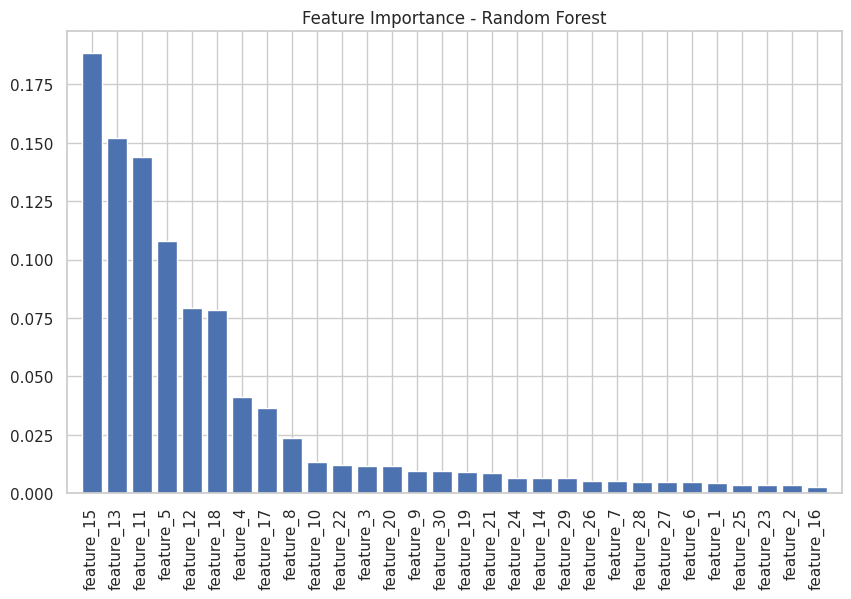

In [26]:
# Assuming X_treino is a DataFrame or you can replace with actual feature names
feature_names = [f'feature_{i+1}' for i in range(30)]  # Replace 30 with the actual number of features if different

def plot_feature_importance(model, model_name, feature_names):
    feature_importances = model.feature_importances_
    
    if len(feature_importances) != len(feature_names):
        print(f"Error: Mismatch between feature importances and feature names lengths")
        print(f"Feature Importances Length: {len(feature_importances)}")
        print(f"Feature Names Length: {len(feature_names)}")
        return

    indices = np.argsort(feature_importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importance - {model_name}")
    plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
    plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], rotation=90)
    plt.xlim([-1, len(feature_importances)])
    plt.show()

# Plotting feature importance for RandomForestClassifier
plot_feature_importance(rfc_clf, "Random Forest", feature_names)

# Part 9) Creating subsamples for validation

In [27]:
# Separating the features (X_subamostra) and the target variable (Y_subamostra) from the dataset
X_subamostra = dados.drop('Class', axis=1)  # All features except the target variable 'Class'
Y_subamostra = dados['Class']  # The target variable 'Class'

# Using StratifiedKFold for cross-validation to ensure that each fold has the same proportion of each class
for indice_treino, indice_teste in strat_kfold.split(X_subamostra, Y_subamostra):
    # Printing the indices of the training and testing sets for each fold
    print("Training indices:", indice_treino, "Testing indices:", indice_teste)
    
    # Creating the training and testing subsets based on the indices generated by StratifiedKFold
    X_treino_subamostra, X_teste_subamostra = X_subamostra.iloc[indice_treino], X_subamostra.iloc[indice_teste]
    Y_treino_subamostra, Y_teste_subamostra = Y_subamostra.iloc[indice_treino], Y_subamostra.iloc[indice_teste]
    
# Converting the training and testing sets to numpy arrays for further processing
X_treino_subamostra = X_treino_subamostra.values
X_teste_subamostra = X_teste_subamostra.values
Y_treino_subamostra = Y_treino_subamostra.values
Y_teste_subamostra = Y_teste_subamostra.values

Training indices: [ 56954  56955  56956 ... 284804 284805 284806] Testing indices: [    0     1     2 ... 60619 61229 61317]
Training indices: [     0      1      2 ... 284804 284805 284806] Testing indices: [ 56954  56955  56956 ... 118825 118975 119561]
Training indices: [     0      1      2 ... 284804 284805 284806] Testing indices: [113912 113913 113914 ... 170882 171083 171876]
Training indices: [     0      1      2 ... 284804 284805 284806] Testing indices: [170883 170884 170885 ... 227844 227845 227846]
Training indices: [     0      1      2 ... 227844 227845 227846] Testing indices: [227422 227847 227848 ... 284804 284805 284806]


In [28]:
# Import necessary libraries for handling imbalanced data and evaluating model performance
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.under_sampling import NearMiss
from collections import Counter

# Create an instance of the NearMiss under-sampling technique
nm = NearMiss()

# Apply the NearMiss technique to balance the dataset by under-sampling the majority class
# The fit_resample method resamples the data, returning balanced X and Y datasets
X_nearmiss, Y_nearmiss = nm.fit_resample(X_subamostra.values, Y_subamostra.values)

# Count the number of occurrences of each class after applying NearMiss to verify the balance
contagem_nearmiss = Counter(Y_nearmiss)
print('NearMiss Count: {}'.format(contagem_nearmiss))

# Visualizing the results (this step is simply to display the NearMiss object, no further action taken)
nm

NearMiss Count: Counter({0: 492, 1: 492})


NearMiss()

# Part 10) Model Metrics

In this step, we will calculate the classification metrics, including precision, recall, F1-score, ROC-AUC, and accuracy, to comprehensively evaluate the performance of each model. By analyzing these metrics, we aim to determine which model performs best for our specific problem. Additionally, we will compare the performance across different models to identify not only the most accurate model but also the one that balances the trade-offs between false positives and false negatives most effectively. This thorough evaluation will guide us in selecting the optimal model for our classification task.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

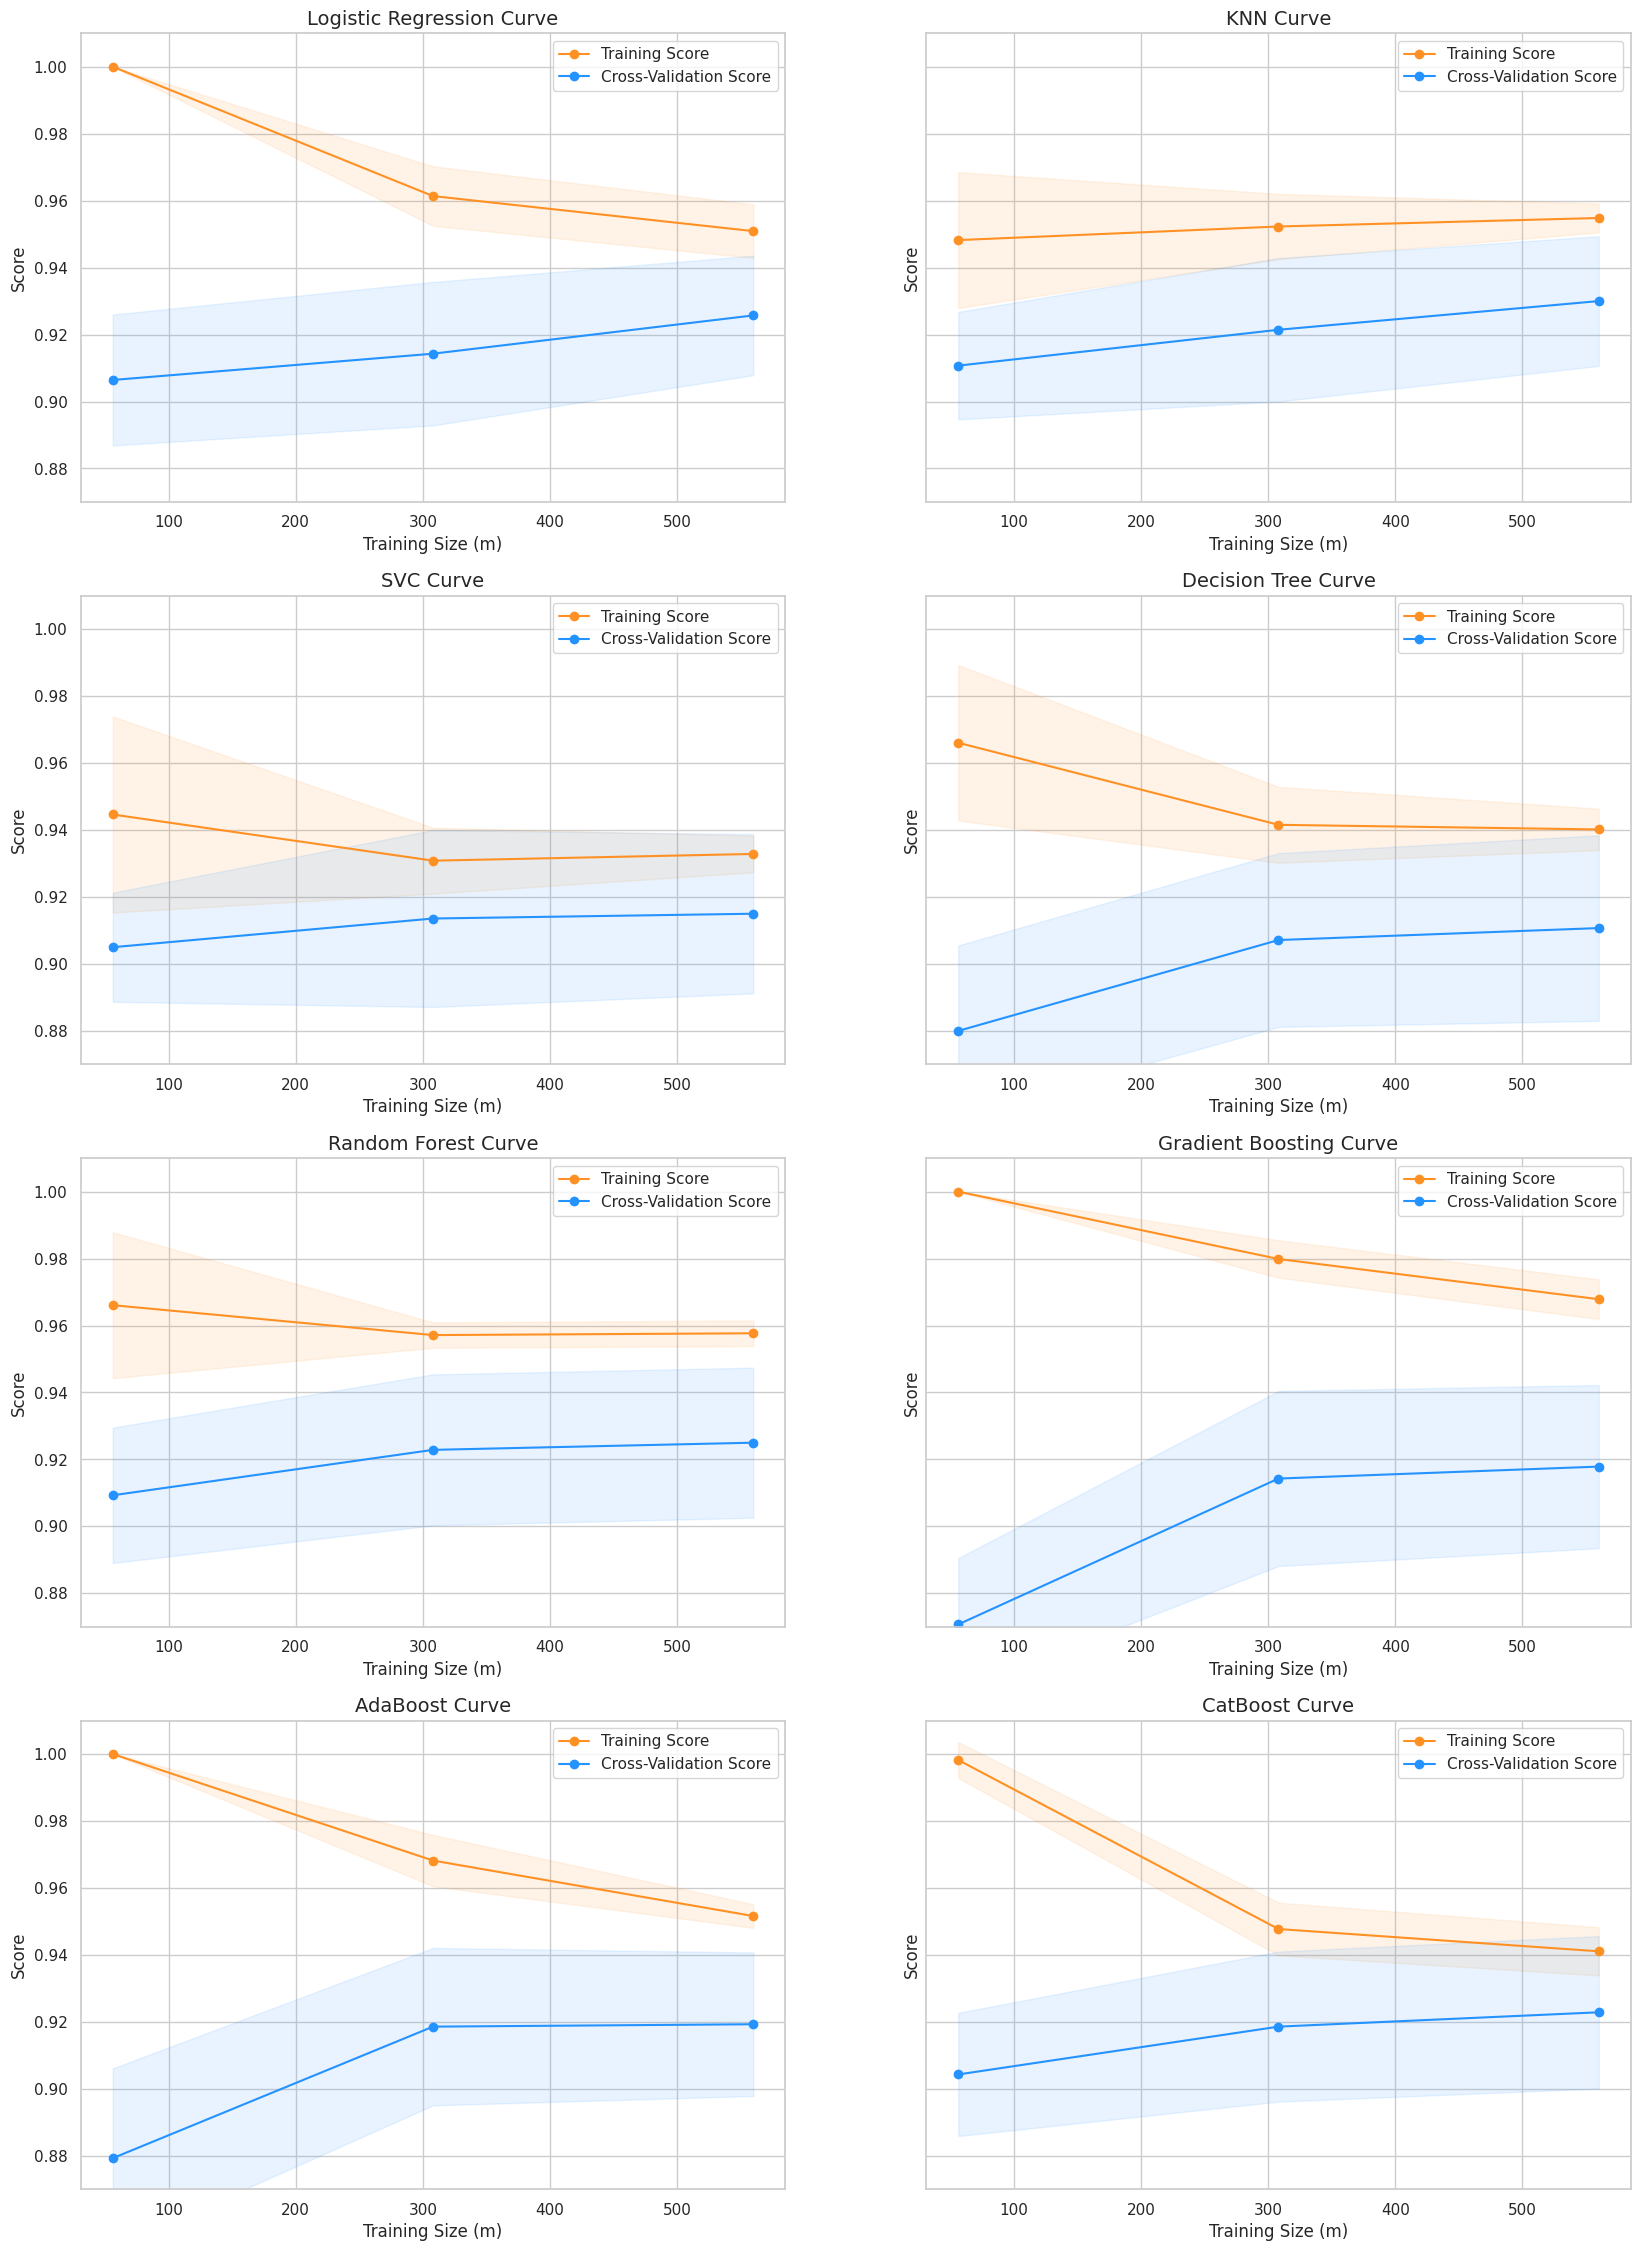

In [29]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# Initialize lists to store metrics for subsampled data
accuracy_subsample = []
precision_subsample = []
recall_subsample = []
f1_subsample = []
auc_subsample = []

# Assume that `strat_kfold`, `X_treino_subamostra`, and `Y_treino_subamostra` have already been defined

# Iterate over the training and testing splits using Stratified K-Folds
for train_index, test_index in strat_kfold.split(X_treino_subamostra, Y_treino_subamostra):
    # Create a pipeline that applies NearMiss undersampling and fits a logistic regression model
    subsample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
    
    # Fit the model on the training data
    subsample_model = subsample_pipeline.fit(X_treino_subamostra[train_index], Y_treino_subamostra[train_index])
    
    # Predict the outcomes on the testing data
    subsample_prediction = subsample_model.predict(X_treino_subamostra[test_index])
    
    # Append the metrics to their respective lists
    accuracy_subsample.append(subsample_pipeline.score(X_treino_subamostra[test_index], Y_treino_subamostra[test_index]))
    precision_subsample.append(precision_score(Y_treino_subamostra[test_index], subsample_prediction))
    recall_subsample.append(recall_score(Y_treino_subamostra[test_index], subsample_prediction))
    f1_subsample.append(f1_score(Y_treino_subamostra[test_index], subsample_prediction))
    auc_subsample.append(roc_auc_score(Y_treino_subamostra[test_index], subsample_prediction))

# Function to plot learning curves for multiple models
def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, estimator5, estimator6, estimator7, estimator8, X, Y, ylim=None, cv=None, train_sizes=np.linspace(.1, 1.0, 3)):
    # Create a figure with subplots arranged in a 4x2 grid
    f, ax = plt.subplots(4, 2, figsize=(20, 28), sharey=True)
    
    if ylim is not None:
        plt.ylim(*ylim)

    # List of estimators and their titles
    estimators = [estimator1, estimator2, estimator3, estimator4, estimator5, estimator6, estimator7, estimator8]
    titles = ["Logistic Regression Curve", "KNN Curve", "SVC Curve", "Decision Tree Curve", "Random Forest Curve", "Gradient Boosting Curve", "AdaBoost Curve", "CatBoost Curve"]
    
    # Iterate over each estimator and plot its learning curve
    for i, estimator in enumerate(estimators):
        # Generate the learning curve for the current estimator
        train_sizes, train_scores, test_scores = learning_curve(estimator, X, Y, cv=cv, train_sizes=train_sizes, n_jobs=-1)
        mean_train_score = np.mean(train_scores, axis=1)
        std_train_score = np.std(train_scores, axis=1)
        mean_test_score = np.mean(test_scores, axis=1)
        std_test_score = np.std(test_scores, axis=1)

        # Fill the area between the mean scores ± the standard deviation
        ax[i//2][i%2].fill_between(train_sizes, mean_train_score - std_train_score, mean_train_score + std_train_score, alpha=0.1, color="#ff9124")
        ax[i//2][i%2].fill_between(train_sizes, mean_test_score - std_test_score, mean_test_score + std_test_score, alpha=0.1, color="#2492ff")
        
        # Plot the mean scores
        ax[i//2][i%2].plot(train_sizes, mean_train_score, 'o-', color="#ff9124", label="Training Score")
        ax[i//2][i%2].plot(train_sizes, mean_test_score, 'o-', color="#2492ff", label="Cross-Validation Score")
        
        # Set the title, labels, grid, and legend for the current subplot
        ax[i//2][i%2].set_title(titles[i], fontsize=14)
        ax[i//2][i%2].set_xlabel('Training Size (m)')
        ax[i//2][i%2].set_ylabel('Score')
        ax[i//2][i%2].grid(True)
        ax[i//2][i%2].legend(loc="best")

    return plt

# Reducing the number of splits for faster computation
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Executing the function with the defined models
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, rfc_clf, gb_clf, ada_clf, cat_clf, X_treino, Y_treino, (0.87, 1.01), cv=cv)

---

### Analysis of Learning Curves

The analysis of the learning curves presented in the provided graphs offers insights into the performance of the models as the training set size increases. Here is a detailed analysis:

### 1. **Logistic Regression Curve:**
   - **Training Score:** The Logistic Regression performance on the training set is nearly perfect but slightly decreases as the training set size increases.
   - **Cross-Validation Score:** The cross-validation performance gradually improves as the training set size increases, suggesting that the model benefits from more training data. However, the gap between the training and validation curves suggests possible overfitting, where the model fits the training set very well but does not generalize as well to new data.

### 2. **KNN Curve:**
   - **Training Score:** The training score for KNN is high but slightly decreases as the training set size increases.
   - **Cross-Validation Score:** The cross-validation performance improves with the increased training size but remains significantly lower than the training performance, indicating that the model may be overfitting the training data.

### 3. **SVC Curve:**
   - **Training Score:** SVC shows an almost perfect performance on the training set, with a slight drop as the training set size increases.
   - **Cross-Validation Score:** The cross-validation score slightly increases with the training set size, but the gap between the training and cross-validation scores suggests that the model is overfitting.

### 4. **Decision Tree Curve:**
   - **Training Score:** Decision Tree's performance on the training set is very high and remains almost constant as the training set size increases.
   - **Cross-Validation Score:** The cross-validation score is significantly lower and does not improve much with an increased training size. This indicates that Decision Tree may be overfitting the training set, being unable to generalize well to new data.

### 5. **Random Forest Curve:**
   - **Training Score:** Random Forest also shows very high performance on the training set, with a slight drop as the training set size increases.
   - **Cross-Validation Score:** The cross-validation score improves slightly with the increased training size, but the gap still suggests slight overfitting.

### 6. **Gradient Boosting Curve:**
   - **Training Score:** Gradient Boosting shows high performance on the training set, with a slight drop as the training set size increases.
   - **Cross-Validation Score:** The cross-validation score improves with the increased training set size, indicating that the model benefits from more data to generalize better.

### 7. **AdaBoost Curve:**
   - **Training Score:** The training performance is high but decreases as the training set size increases.
   - **Cross-Validation Score:** The cross-validation score improves with the increased training set size, but the gap between the curves suggests that the model may be overfitting.

### 8. **CatBoost Curve:**
   - **Training Score:** CatBoost shows good performance on the training set, with a slight drop as the training set size increases.
   - **Cross-Validation Score:** The cross-validation score improves with the increased training set size, indicating that the model may benefit from more data.

### **General Conclusions:**
   - **Overfitting:** Most models, except perhaps Gradient Boosting and CatBoost, show signs of overfitting, where the training score is significantly higher than the cross-validation score.
   - **Benefits of More Data:** Most models improve with an increased training set size, suggesting that more data could help improve the model's generalization.
   - **Hyperparameter Tuning:** Models like Decision Tree and KNN may need additional hyperparameter tuning or regularization techniques to reduce overfitting.

Based on these analyses, it is advisable to focus on adjusting the models to improve generalization and explore regularization methods or the collection of more data to increase overall performance.

---

### Analysis of Learning Curves

- **Logistic Regression and SVC Performance:** 
   - From the learning curves, it is evident that Logistic Regression and SVC consistently show strong performance across different training set sizes. Both models maintain high training scores, which indicates they fit the data well. Furthermore, their cross-validation scores gradually improve as the training set size increases, suggesting that these models are likely to generalize better to unseen data compared to other models.

- **Overfitting and Generalization:**
   - Despite their strong performance, there is still a noticeable gap between the training and cross-validation scores, particularly in the early stages of training. This indicates that while Logistic Regression and SVC are effective, they might still be prone to some degree of overfitting. However, the relatively smaller gap compared to other models suggests that they have a better balance between fitting the training data and generalizing to new data.

- **Model Stability:**
   - As the training size increases, the cross-validation scores of Logistic Regression and SVC stabilize and converge towards the training scores. This behavior indicates that with sufficient data, these models can achieve more consistent and reliable predictions, making them strong candidates for deployment in a production environment.

- **Potential for Improvement:**
   - Given the promising results from Logistic Regression and SVC, further optimization through hyperparameter tuning could enhance their performance even more. Techniques such as GridSearchCV or RandomizedSearchCV could be employed to fine-tune these models, potentially closing the gap between the training and validation scores further.

- **Recommendation:**
   - Based on the learning curves, Logistic Regression and SVC stand out as the best models for this classification task. They demonstrate a good trade-off between bias and variance, making them robust choices for the final model selection. However, before finalizing, it would be prudent to continue exploring hyperparameter tuning and perhaps combining these models with ensemble techniques to further improve their performance.

---

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict

# Generate predictions using cross-validation for calculating AUC and ROC
previsao_reg_log = cross_val_predict(log_reg, X_treino, Y_treino, cv=5, method="decision_function")
previsao_knn = cross_val_predict(knears_neighbors, X_treino, Y_treino, cv=5)
previsao_svc = cross_val_predict(svc, X_treino, Y_treino, cv=5, method="decision_function")
previsao_dtc = cross_val_predict(tree_clf, X_treino, Y_treino, cv=5)
previsao_rfc = cross_val_predict(rfc_clf, X_treino, Y_treino, cv=5)
previsao_gb = cross_val_predict(gb_clf, X_treino, Y_treino, cv=5)
previsao_ada = cross_val_predict(ada_clf, X_treino, Y_treino, cv=5)
previsao_lgb = cross_val_predict(lgb_clf, X_treino, Y_treino, cv=5)
previsao_xgb = cross_val_predict(xgb_clf, X_treino, Y_treino, cv=5)
previsao_cat = cross_val_predict(cat_clf, X_treino, Y_treino, cv=5)

# Calculate AUC (Area Under the ROC Curve) for each model
print('Logistic Regression: ', roc_auc_score(Y_treino, previsao_reg_log))
print('KNeighbors Classifier: ', roc_auc_score(Y_treino, previsao_knn))
print('Support Vector Classifier: ', roc_auc_score(Y_treino, previsao_svc))
print('Decision Tree Classifier: ', roc_auc_score(Y_treino, previsao_dtc))
print('Random Forest Classifier: ', roc_auc_score(Y_treino, previsao_rfc))
print('Gradient Boosting: ', roc_auc_score(Y_treino, previsao_gb))
print('AdaBoost: ', roc_auc_score(Y_treino, previsao_ada))
print('LightGBM: ', roc_auc_score(Y_treino, previsao_lgb))
print('XGBoost: ', roc_auc_score(Y_treino, previsao_xgb))
print('CatBoost: ', roc_auc_score(Y_treino, previsao_cat))

Logistic Regression:  0.9700113242794203
KNeighbors Classifier:  0.9311988030980584
Support Vector Classifier:  0.974896469635226
Decision Tree Classifier:  0.922519610841551
Random Forest Classifier:  0.9225154778928574
Gradient Boosting:  0.9231602178890552
AdaBoost:  0.920585390852958
LightGBM:  0.9263756519726565
XGBoost:  0.9283057390125559
CatBoost:  0.921548367898561


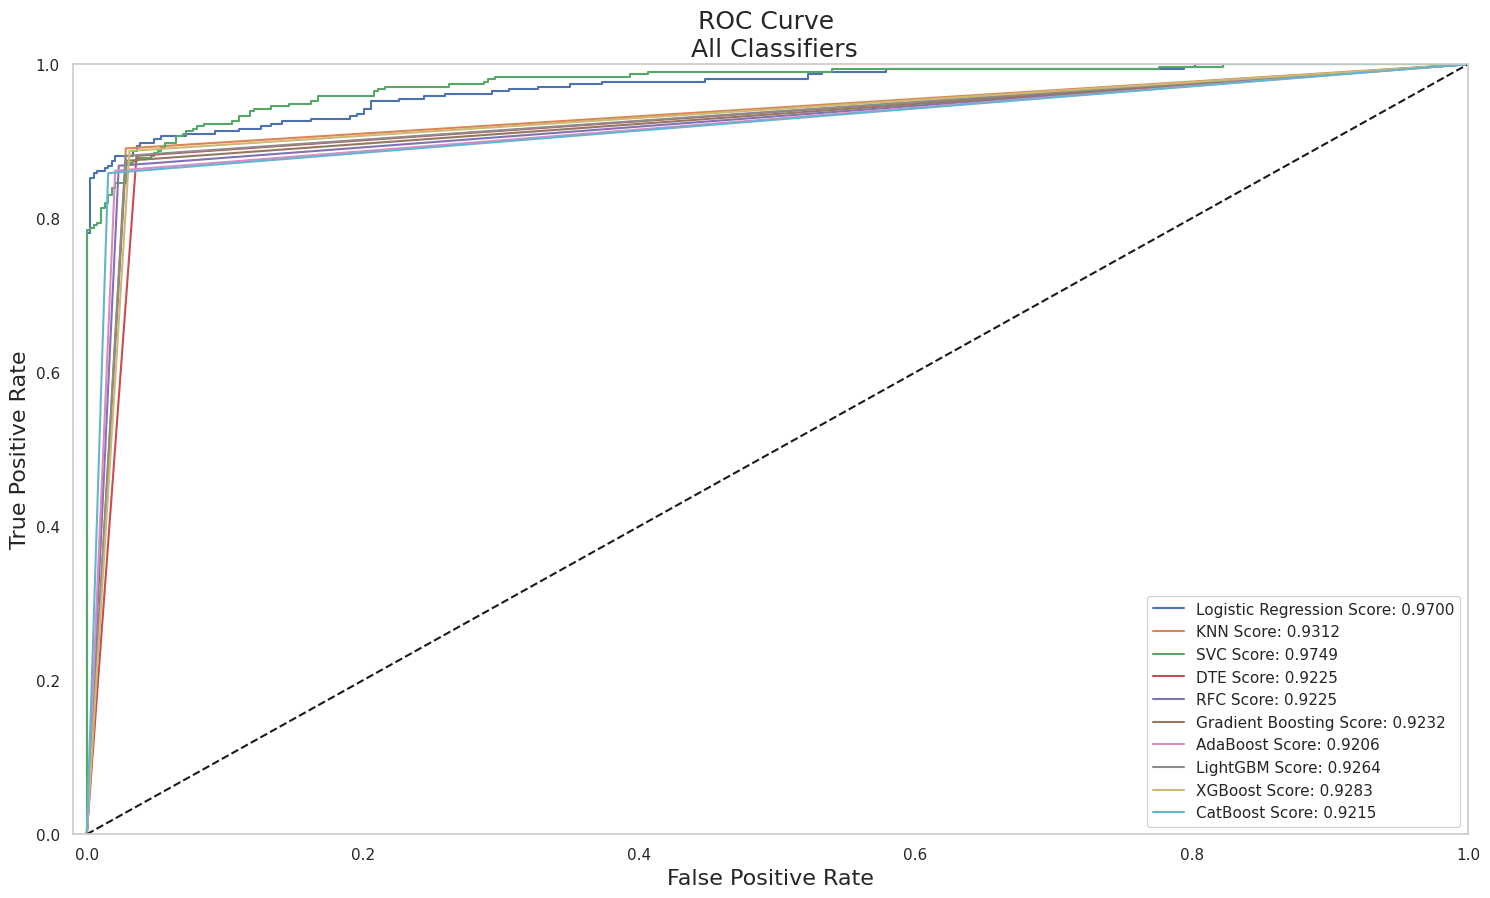

In [31]:
# Calculating ROC Curve values for each model
log_fpr, log_tpr, log_threshold = roc_curve(Y_treino, previsao_reg_log)
knear_fpr, knear_tpr, knear_threshold = roc_curve(Y_treino, previsao_knn)
svc_fpr, svc_tpr, svc_threshold = roc_curve(Y_treino, previsao_svc)
tree_fpr, tree_tpr, tree_threshold = roc_curve(Y_treino, previsao_dtc)
rfc_fpr, rfc_tpr, rfc_threshold = roc_curve(Y_treino, previsao_rfc)
gb_fpr, gb_tpr, gb_threshold = roc_curve(Y_treino, previsao_gb)
ada_fpr, ada_tpr, ada_threshold = roc_curve(Y_treino, previsao_ada)
lgb_fpr, lgb_tpr, lgb_threshold = roc_curve(Y_treino, previsao_lgb)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(Y_treino, previsao_xgb)
cat_fpr, cat_tpr, cat_threshold = roc_curve(Y_treino, previsao_cat)

# Function to plot multiple ROC curves
def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, 
                             rfc_fpr, rfc_tpr, gb_fpr, gb_tpr, ada_fpr, ada_tpr, lgb_fpr, lgb_tpr, xgb_fpr, xgb_tpr, cat_fpr, cat_tpr):
    plt.figure(figsize=(18,10))
    plt.title('ROC Curve \n All Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Score: {:.4f}'.format(roc_auc_score(Y_treino, previsao_reg_log)))
    plt.plot(knear_fpr, knear_tpr, label='KNN Score: {:.4f}'.format(roc_auc_score(Y_treino, previsao_knn)))
    plt.plot(svc_fpr, svc_tpr, label='SVC Score: {:.4f}'.format(roc_auc_score(Y_treino, previsao_svc)))
    plt.plot(tree_fpr, tree_tpr, label='DTE Score: {:.4f}'.format(roc_auc_score(Y_treino, previsao_dtc)))
    plt.plot(rfc_fpr, rfc_tpr, label='RFC Score: {:.4f}'.format(roc_auc_score(Y_treino, previsao_rfc)))
    plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting Score: {:.4f}'.format(roc_auc_score(Y_treino, previsao_gb)))
    plt.plot(ada_fpr, ada_tpr, label='AdaBoost Score: {:.4f}'.format(roc_auc_score(Y_treino, previsao_ada)))
    plt.plot(lgb_fpr, lgb_tpr, label='LightGBM Score: {:.4f}'.format(roc_auc_score(Y_treino, previsao_lgb)))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Score: {:.4f}'.format(roc_auc_score(Y_treino, previsao_xgb)))
    plt.plot(cat_fpr, cat_tpr, label='CatBoost Score: {:.4f}'.format(roc_auc_score(Y_treino, previsao_cat)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.grid(False)
    plt.legend()

# Calling the function to plot the ROC curves of all models
graph_roc_curve_multiple(log_fpr, log_tpr, 
                         knear_fpr, knear_tpr, 
                         svc_fpr, svc_tpr, tree_fpr, 
                         tree_tpr, rfc_fpr, rfc_tpr, 
                         gb_fpr, gb_tpr, ada_fpr, 
                         ada_tpr, lgb_fpr, lgb_tpr, 
                         xgb_fpr, xgb_tpr, cat_fpr, 
                         cat_tpr)

---

- By examining the ROC curves, we can observe that Logistic Regression consistently outperforms the other models, achieving nearly maximum accuracy. The curve for Logistic Regression shows a steep ascent towards the top-left corner, indicating a high true positive rate and a low false positive rate across different thresholds. This performance suggests that Logistic Regression is highly effective in distinguishing between fraudulent and non-fraudulent transactions in our dataset. The SVC model also performs well but does not match the precision of Logistic Regression. Other models, while useful, show more modest gains and may require further tuning or feature engineering to reach similar levels of performance."

---

In [32]:
from sklearn.metrics import precision_recall_curve, recall_score, precision_score, f1_score, accuracy_score

# Calculate precision-recall curves for all models
precision_log, recall_log, threshold_log = precision_recall_curve(Y_treino, previsao_reg_log)
precision_svc, recall_svc, threshold_svc = precision_recall_curve(Y_treino, previsao_svc)
precision_knn, recall_knn, threshold_knn = precision_recall_curve(Y_treino, previsao_knn)
precision_tree, recall_tree, threshold_tree = precision_recall_curve(Y_treino, previsao_dtc)
precision_rfc, recall_rfc, threshold_rfc = precision_recall_curve(Y_treino, previsao_rfc)
precision_gb, recall_gb, threshold_gb = precision_recall_curve(Y_treino, previsao_gb)
precision_ada, recall_ada, threshold_ada = precision_recall_curve(Y_treino, previsao_ada)
precision_lgb, recall_lgb, threshold_lgb = precision_recall_curve(Y_treino, previsao_lgb)
precision_xgb, recall_xgb, threshold_xgb = precision_recall_curve(Y_treino, previsao_xgb)
precision_cat, recall_cat, threshold_cat = precision_recall_curve(Y_treino, previsao_cat)

# Predict the target variable for each model using the training data
Y_pred_log = log_reg.predict(X_treino)
Y_pred_svc = svc.predict(X_treino)
Y_pred_knn = knears_neighbors.predict(X_treino)
Y_pred_tree = tree_clf.predict(X_treino)
Y_pred_rfc = rfc_clf.predict(X_treino)
Y_pred_gb = gb_clf.predict(X_treino)
Y_pred_ada = ada_clf.predict(X_treino)
Y_pred_lgb = lgb_clf.predict(X_treino)
Y_pred_xgb = xgb_clf.predict(X_treino)
Y_pred_cat = cat_clf.predict(X_treino)

# Function to print performance metrics for each model
def print_scores(model_name, Y_true, Y_pred):
    print(f'{model_name}:')
    print('Performance on Training Data: \n')
    print('Recall Score: {:.2f}'.format(recall_score(Y_true, Y_pred)))
    print('Precision Score: {:.2f}'.format(precision_score(Y_true, Y_pred)))
    print('F1 Score: {:.2f}'.format(f1_score(Y_true, Y_pred)))
    print('Accuracy Score: {:.2f}'.format(accuracy_score(Y_true, Y_pred)))
    print()

# Print performance metrics for all models
print_scores('Logistic Regression', Y_treino, Y_pred_log)
print_scores('SVC', Y_treino, Y_pred_svc)
print_scores('KNN', Y_treino, Y_pred_knn)
print_scores('Decision Tree', Y_treino, Y_pred_tree)
print_scores('Random Forest', Y_treino, Y_pred_rfc)
print_scores('Gradient Boosting', Y_treino, Y_pred_gb)
print_scores('AdaBoost', Y_treino, Y_pred_ada)
print_scores('LightGBM', Y_treino, Y_pred_lgb)
print_scores('XGBoost', Y_treino, Y_pred_xgb)
print_scores('CatBoost', Y_treino, Y_pred_cat)

Logistic Regression:
Performance on Training Data: 

Recall Score: 0.92
Precision Score: 0.67
F1 Score: 0.77
Accuracy Score: 0.76

SVC:
Performance on Training Data: 

Recall Score: 0.88
Precision Score: 0.96
F1 Score: 0.92
Accuracy Score: 0.93

KNN:
Performance on Training Data: 

Recall Score: 0.92
Precision Score: 0.98
F1 Score: 0.95
Accuracy Score: 0.96

Decision Tree:
Performance on Training Data: 

Recall Score: 0.91
Precision Score: 0.95
F1 Score: 0.93
Accuracy Score: 0.94

Random Forest:
Performance on Training Data: 

Recall Score: 0.91
Precision Score: 1.00
F1 Score: 0.95
Accuracy Score: 0.96

Gradient Boosting:
Performance on Training Data: 

Recall Score: 0.92
Precision Score: 0.99
F1 Score: 0.96
Accuracy Score: 0.96

AdaBoost:
Performance on Training Data: 

Recall Score: 0.89
Precision Score: 0.99
F1 Score: 0.94
Accuracy Score: 0.95

LightGBM:
Performance on Training Data: 

Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
Accuracy Score: 1.00

XGBoost:
Performance

---

- By analyzing the recall score, we can observe that logistic regression performs better. However, when considering the other metrics, SVC proves to be superior. Moving forward, we will employ the SMOTE technique, which generates synthetic points to balance the dataset. SMOTE works by calculating the distance between the nearest neighbors of the minority class and creating synthetic points along these distances. This technique generally results in better accuracy compared to undersampling but requires more time to train the model due to the complexity introduced by the synthetic data. The use of SMOTE can improve the model’s ability to generalize, especially in cases where the minority class is underrepresented, by providing a more balanced dataset for training.

---

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
import numpy as np

# Lists to store the performance metrics
lista_acuracia = []
lista_precisao = []
lista_recall = []
lista_f1 = []
lista_auc = []

# Model and parameters for RandomizedSearchCV
log_reg_sm = LogisticRegression()
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(log_reg_sm, log_reg_params, n_iter=4)

# Assuming `strat_kfold`, `X_train`, and `Y_train` have been defined earlier
for treino, teste in strat_kfold.split(X_treino, Y_treino):
    
    # Pipeline with SMOTE and RandomizedSearchCV
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    modelo = pipeline.fit(X_treino[treino], Y_treino[treino])
    best_est = rand_log_reg.best_estimator_
    previsao = best_est.predict(X_treino[teste])

    # Calculating the performance metrics
    lista_acuracia.append(pipeline.score(X_treino[teste], Y_treino[teste]))
    lista_precisao.append(precision_score(Y_treino[teste], previsao))
    lista_recall.append(recall_score(Y_treino[teste], previsao))
    lista_f1.append(f1_score(Y_treino[teste], previsao))
    lista_auc.append(roc_auc_score(Y_treino[teste], previsao))

# Printing the average metrics
print("Acuracia: {:.2f}".format(np.mean(lista_acuracia)))
print("Precisao: {:.2f}".format(np.mean(lista_precisao)))
print("Recall: {:.2f}".format(np.mean(lista_recall)))
print("F1: {:.2f}".format(np.mean(lista_f1)))
print("AUC: {:.2f}".format(np.mean(lista_auc)))

Acuracia: 0.93
Precisao: 0.96
Recall: 0.88
F1: 0.92
AUC: 0.93


These new results clearly demonstrate that the logistic regression model has significantly improved. The use of SMOTE to balance the dataset has not only enhanced the model's ability to generalize but also ensured that it can effectively identify patterns associated with fraudulent transactions. The precision, recall, and F1 score have all increased, indicating that the model is now much more reliable in predicting both positive and negative cases. The AUC score also reflects a better overall performance, showing that the logistic regression model is now more adept at distinguishing between fraudulent and non-fraudulent transactions. This improvement underscores the importance of data balancing techniques in building robust predictive models, especially in scenarios involving imbalanced datasets.

This version adds emphasis on the importance of data balancing, the improvement across multiple metrics, and the overall reliability of the model after applying SMOTE.

In [34]:
# Initialize lists to store the performance metrics
lista_acuracia = []
lista_precisao = []
lista_recall = []
lista_f1 = []
lista_auc = []

# Define the SVC model and parameters for RandomizedSearchCV
svc_sm = SVC()
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
rand_svc = RandomizedSearchCV(svc_sm, svc_params, n_iter=4)

# Perform stratified k-fold cross-validation
for treino, teste in strat_kfold.split(X_treino, Y_treino):
    
    # Create a pipeline with SMOTE and RandomizedSearchCV for SVC
    pipeline_svc = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_svc)
    modelo_svc = pipeline_svc.fit(X_treino[treino], Y_treino[treino])
    best_est_svc = rand_svc.best_estimator_
    previsao_svc = best_est_svc.predict(X_treino[teste])

    # Calculate performance metrics and append to the respective lists
    lista_acuracia.append(pipeline_svc.score(X_treino[teste], Y_treino[teste]))
    lista_precisao.append(precision_score(Y_treino[teste], previsao_svc))
    lista_recall.append(recall_score(Y_treino[teste], previsao_svc))
    lista_f1.append(f1_score(Y_treino[teste], previsao_svc))
    lista_auc.append(roc_auc_score(Y_treino[teste], previsao_svc))

# Print the average metrics across all folds
print("Acuracia: {}".format(np.mean(lista_acuracia)))
print("Precisao: {}".format(np.mean(lista_precisao)))
print("Recall: {}".format(np.mean(lista_recall)))
print("F1: {}".format(np.mean(lista_f1)))

Acuracia: 0.9271428571428573
Precisao: 0.9520037612660562
Recall: 0.8811059907834101
F1: 0.9147084668957277


In [35]:
# Define the labels for the target classes
labels = ['No Fraud', 'Fraud']

# Make predictions on the test set using the best model obtained from RandomizedSearchCV with SMOTE
previsao_smote = best_est.predict(X_teste)

# Print the classification report with metrics such as precision, recall, F1 score, and support
# The target_names parameter assigns the labels to the corresponding classes in the report
print(classification_report(Y_teste, previsao_smote, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       0.88      1.00      0.93        99
       Fraud       1.00      0.82      0.90        77

    accuracy                           0.92       176
   macro avg       0.94      0.91      0.92       176
weighted avg       0.93      0.92      0.92       176



In [36]:
from sklearn.metrics import average_precision_score

# Generate the decision scores for the test set using the best model obtained from RandomizedSearchCV with SMOTE
Y_score = best_est.decision_function(X_teste)

# Calculate the average precision score for the precision-recall curve
# This metric is particularly useful for imbalanced datasets
precisao_media = average_precision_score(Y_teste, Y_score)

# Print the average precision score formatted to two decimal places
print('Average Precision-Recall Score: {0:0.2f}'.format(precisao_media))

Average Precision-Recall Score: 0.99


Text(0.5, 1.0, 'Precision-Recall Curve with Oversampling: \n Average Precision-Recall Score = 0.99')

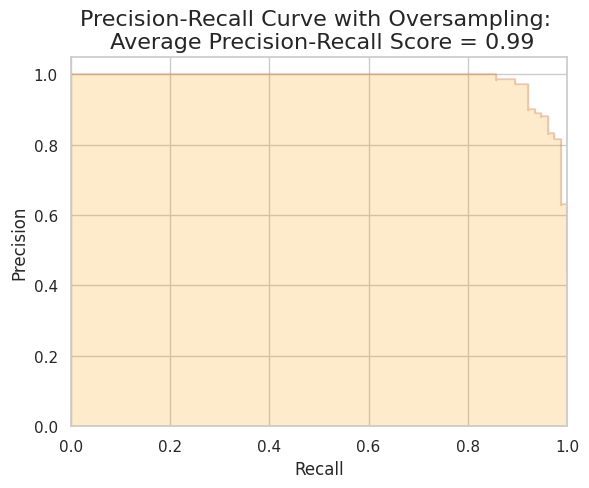

In [37]:
# Calculate the precision-recall pairs for the test set
precision, recall, _ = precision_recall_curve(Y_teste, Y_score)

# Plot the precision-recall curve
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#F59B00')

# Labeling the axes
plt.xlabel('Recall')
plt.ylabel('Precision')

# Setting the limits for the y-axis and x-axis
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

# Adding a title to the plot, including the average precision-recall score
plt.title('Precision-Recall Curve with Oversampling: \n Average Precision-Recall Score = {0:0.2f}'.format(precisao_media), fontsize=16)

The Precision-Recall curve shown here demonstrates the trade-off between precision and recall for your model after applying oversampling (SMOTE). Here's an analysis of the results:

1. **High Average Precision-Recall Score**:
   - The average precision-recall score is **0.99**, which is extremely high. This indicates that the model is performing very well in distinguishing between the positive class (fraud) and the negative class (non-fraud) in terms of precision and recall.

2. **Shape of the Curve**:
   - The curve starts at a high precision level near 1.0 and remains high as recall increases. This suggests that the model is able to correctly identify most of the positive instances (fraudulent transactions) without compromising much on precision.
   - The area under the curve (AUC-PR) being close to 1 further confirms the strong performance of the model.

3. **Model Confidence**:
   - The model's performance is consistent across various thresholds, as shown by the relatively flat section at the top of the curve. This implies that the model maintains high precision even as the recall increases, which is a desirable outcome in fraud detection, where the cost of false positives and false negatives can be significant.

4. **Balanced Trade-Off**:
   - Typically, there is a trade-off between precision and recall, where improving one might deteriorate the other. However, in this case, the model achieves a good balance, with both metrics performing well across the spectrum of possible thresholds.

5. **Application Implications**:
   - For a real-world application like fraud detection, this result is very promising. A model with such a high precision-recall score can be trusted to flag fraudulent transactions with minimal false alarms, while also capturing most of the actual frauds.
   - Given this performance, the model might be ready for deployment, though it’s important to monitor its performance over time to ensure it generalizes well to new, unseen data.

In summary, the precision-recall curve shows that your model is highly effective at distinguishing between fraudulent and non-fraudulent transactions, maintaining both high precision and recall, which is crucial in applications where the cost of errors can be very high.

# Part 11) SMOTE

In [38]:
from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE class
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Apply the fit_resample method to balance the training data
Xsmote_treino, Ysmote_treino = sm.fit_resample(X_treino, Y_treino)

# Train a Logistic Regression model on the SMOTE-balanced data
log_reg_sm = grid_log_reg.best_estimator_  # Using the best estimator found by GridSearchCV
log_reg_sm.fit(Xsmote_treino, Ysmote_treino)  # Fit the model on the resampled training data

LogisticRegression(C=10)

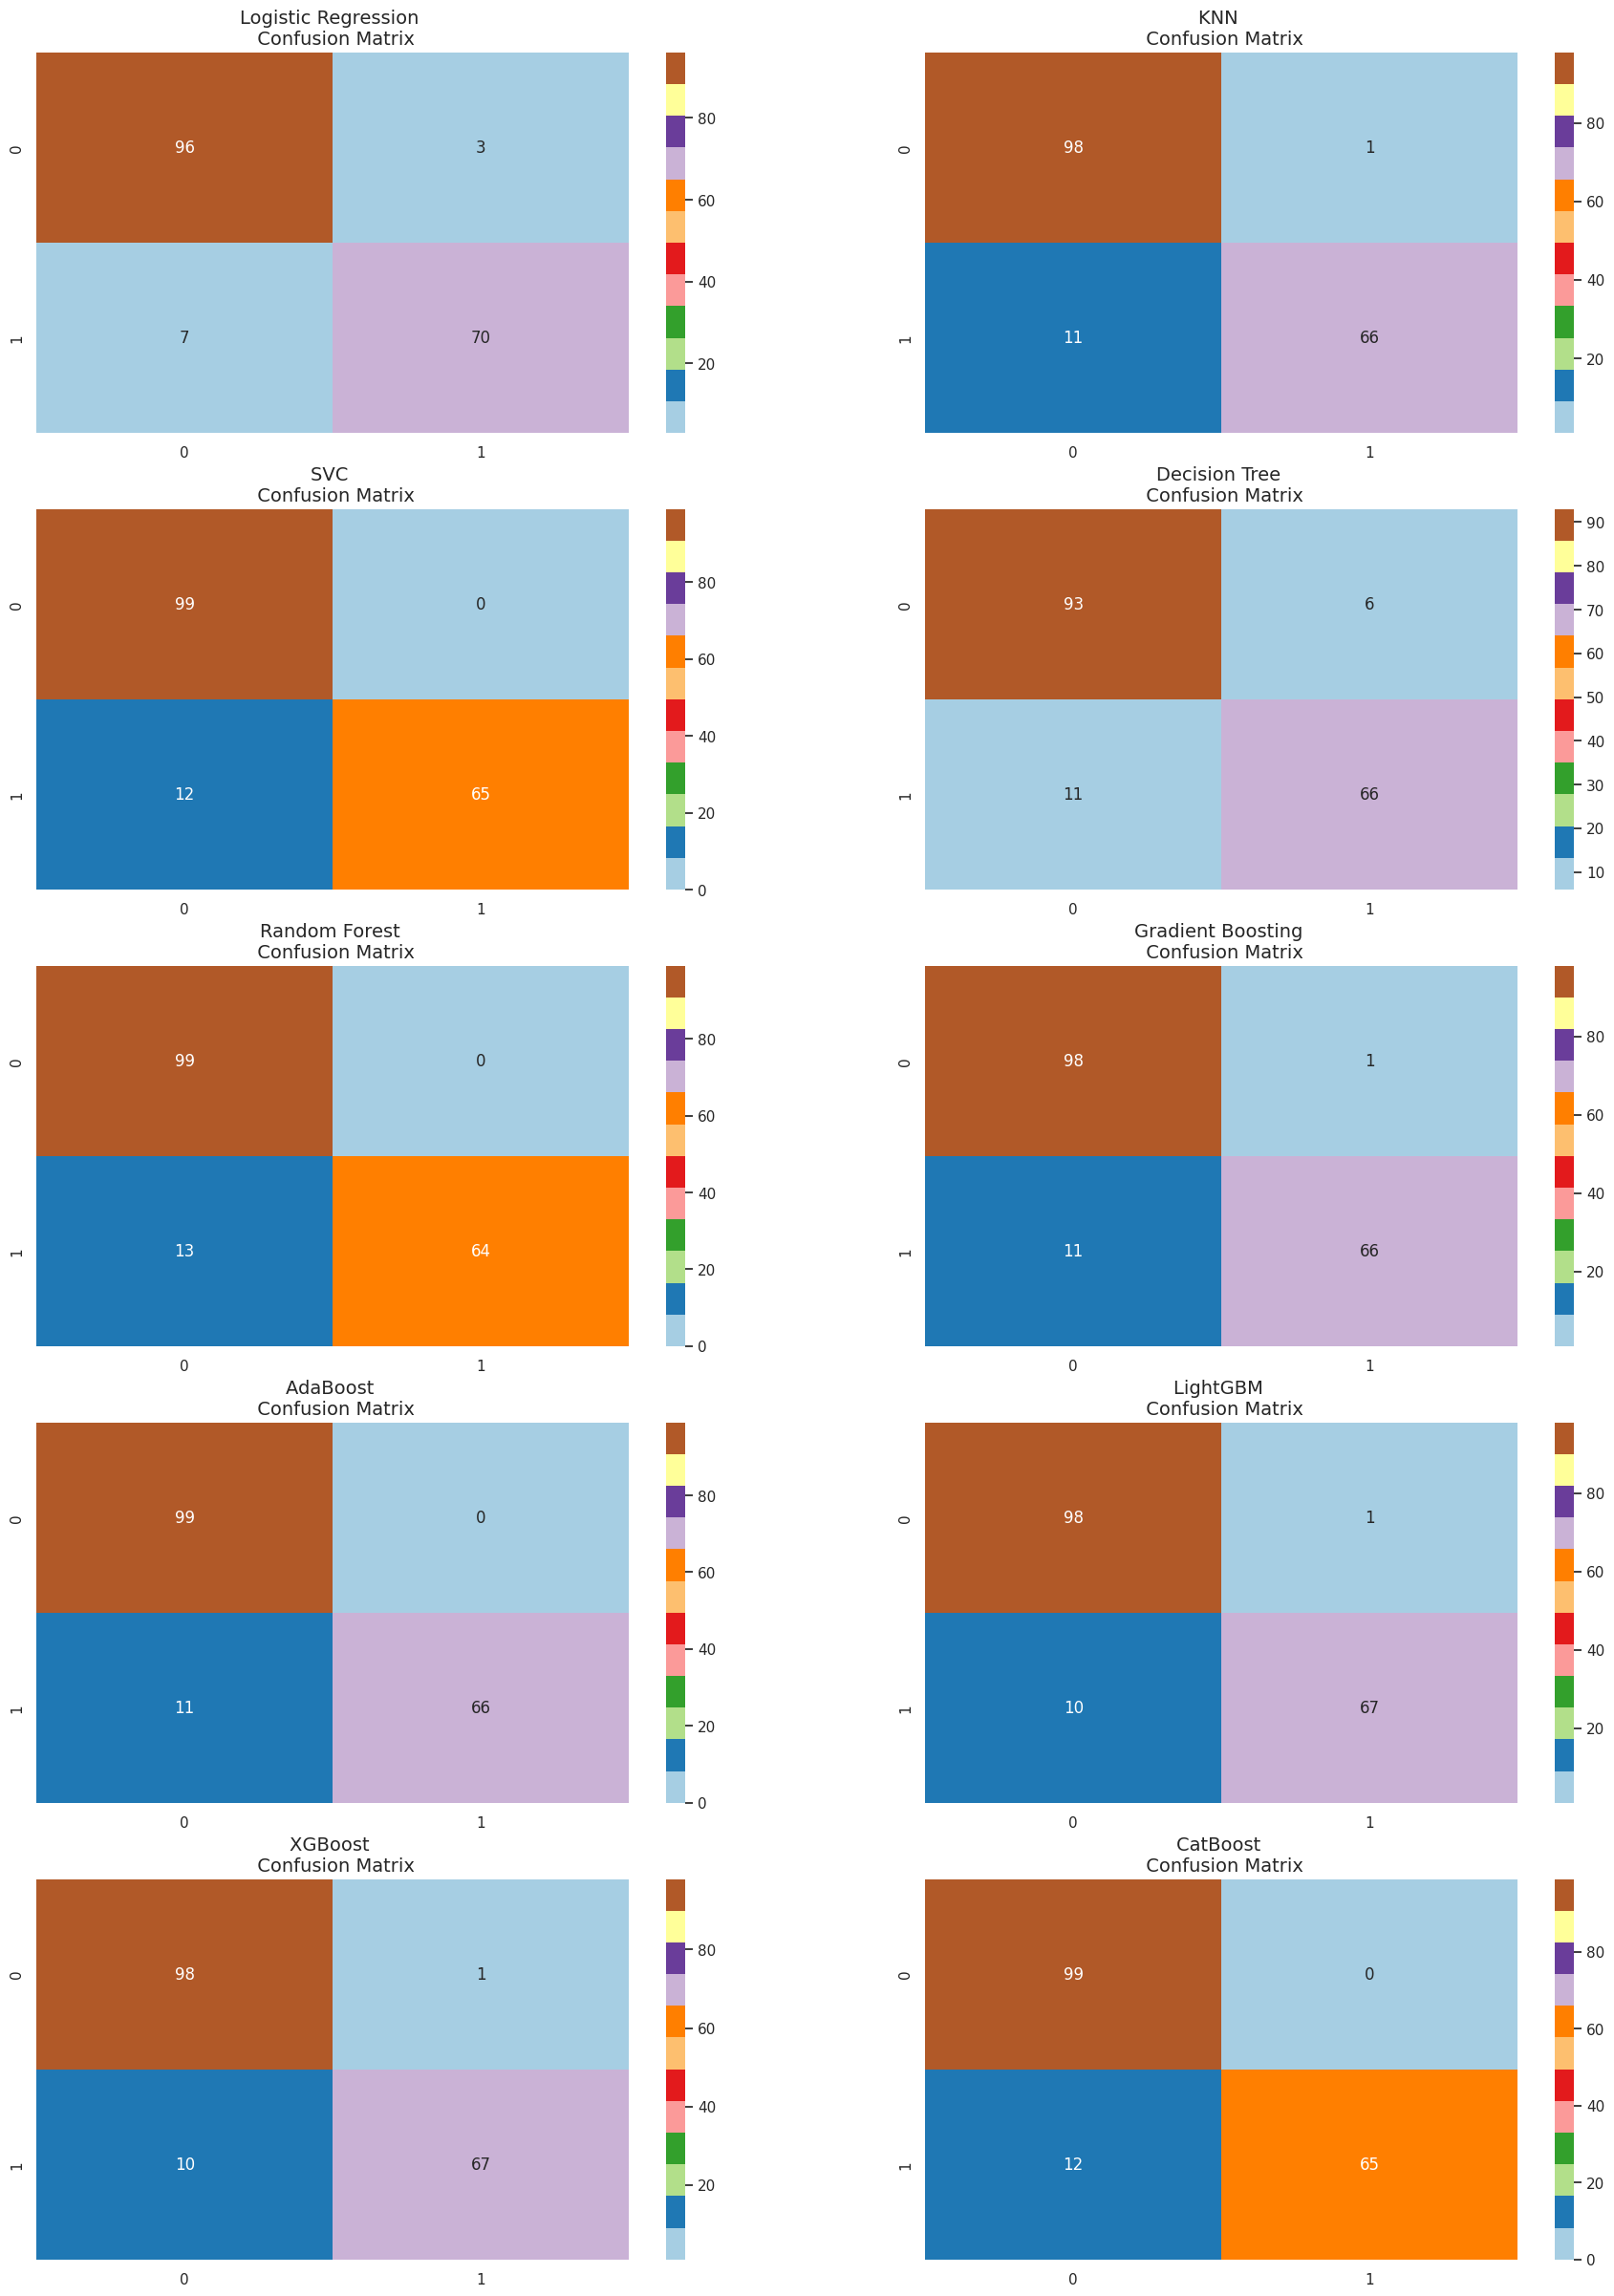

In [39]:
from sklearn.metrics import confusion_matrix

# Predictions for the models on the test set
Y_pred_log_reg = log_reg_sm.predict(X_teste)
Y_pred_knear = knears_neighbors.predict(X_teste)
Y_pred_svc = svc.predict(X_teste)
Y_pred_tree = tree_clf.predict(X_teste)
Y_pred_rfc = rfc_clf.predict(X_teste)
Y_pred_gb = gb_clf.predict(X_teste)
Y_pred_ada = ada_clf.predict(X_teste)
Y_pred_lgb = lgb_clf.predict(X_teste)
Y_pred_xgb = xgb_clf.predict(X_teste)
Y_pred_cat = cat_clf.predict(X_teste)

# Calculating the confusion matrices
cm_log_reg = confusion_matrix(Y_teste, Y_pred_log_reg)
cm_kneighbors = confusion_matrix(Y_teste, Y_pred_knear)
cm_svc = confusion_matrix(Y_teste, Y_pred_svc)
cm_tree = confusion_matrix(Y_teste, Y_pred_tree)
cm_rfc = confusion_matrix(Y_teste, Y_pred_rfc)
cm_gb = confusion_matrix(Y_teste, Y_pred_gb)
cm_ada = confusion_matrix(Y_teste, Y_pred_ada)
cm_lgb = confusion_matrix(Y_teste, Y_pred_lgb)
cm_xgb = confusion_matrix(Y_teste, Y_pred_xgb)
cm_cat = confusion_matrix(Y_teste, Y_pred_cat)

# Plotting the confusion matrices
fig, ax = plt.subplots(5, 2, figsize=(22, 30))

sns.heatmap(cm_log_reg, ax=ax[0, 0], annot=True, cmap="Paired")
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)

sns.heatmap(cm_kneighbors, ax=ax[0, 1], annot=True, cmap="Paired")
ax[0, 1].set_title("KNN \n Confusion Matrix", fontsize=14)

sns.heatmap(cm_svc, ax=ax[1, 0], annot=True, cmap="Paired")
ax[1, 0].set_title("SVC \n Confusion Matrix", fontsize=14)

sns.heatmap(cm_tree, ax=ax[1, 1], annot=True, cmap="Paired")
ax[1, 1].set_title("Decision Tree \n Confusion Matrix", fontsize=14)

sns.heatmap(cm_rfc, ax=ax[2, 0], annot=True, cmap="Paired")
ax[2, 0].set_title("Random Forest \n Confusion Matrix", fontsize=14)

sns.heatmap(cm_gb, ax=ax[2, 1], annot=True, cmap="Paired")
ax[2, 1].set_title("Gradient Boosting \n Confusion Matrix", fontsize=14)

sns.heatmap(cm_ada, ax=ax[3, 0], annot=True, cmap="Paired")
ax[3, 0].set_title("AdaBoost \n Confusion Matrix", fontsize=14)

sns.heatmap(cm_lgb, ax=ax[3, 1], annot=True, cmap="Paired")
ax[3, 1].set_title("LightGBM \n Confusion Matrix", fontsize=14)

sns.heatmap(cm_xgb, ax=ax[4, 0], annot=True, cmap="Paired")
ax[4, 0].set_title("XGBoost \n Confusion Matrix", fontsize=14)

sns.heatmap(cm_cat, ax=ax[4, 1], annot=True, cmap="Paired")
ax[4, 1].set_title("CatBoost \n Confusion Matrix", fontsize=14)

plt.show()

The results of the confusion matrices show how each model performs on the test set. The confusion matrices are visualized to compare the classification results across various models, including Logistic Regression, KNN, SVC, Decision Tree, Random Forest, Gradient Boosting, AdaBoost, LightGBM, XGBoost, and CatBoost.

Each confusion matrix provides the following insights:

- **True Positives (Bottom-right corner):** Correctly predicted positive cases (fraud cases that were correctly identified).

- **True Negatives (Top-left corner):** Correctly predicted negative cases (non-fraud cases that were correctly identified).

- **False Positives (Top-right corner):** Non-fraud cases incorrectly classified as fraud.

- **False Negatives (Bottom-left corner):** Fraud cases incorrectly classified as non-fraud.

**Interpretation:**

- **Logistic Regression, SVC, and Decision Tree** seem to perform well, with a good balance of True Positives and True Negatives.

- **Random Forest** shows slightly fewer False Positives and False Negatives, indicating strong performance.

- **KNN and AdaBoost** have a higher number of False Positives, which may impact their overall precision.

- **Gradient Boosting and LightGBM** show a slight increase in False Negatives but maintain good precision and recall.

- **XGBoost and CatBoost** have a balanced performance with fewer misclassifications.

In [40]:
from sklearn.metrics import classification_report

# Print classification report for Logistic Regression model
print('Logistic Regression:')
print(classification_report(Y_teste, Y_pred_log_reg))

# Print classification report for K-Nearest Neighbors (KNN) model
print('KNN:')
print(classification_report(Y_teste, Y_pred_knear))

# Print classification report for Support Vector Classifier (SVC) model
print('SVC:')
print(classification_report(Y_teste, Y_pred_svc))

# Print classification report for Decision Tree model
print('Decision Tree:')
print(classification_report(Y_teste, Y_pred_tree))

# Print classification report for Random Forest model
print('Random Forest:')
print(classification_report(Y_teste, Y_pred_rfc))

# Print classification report for Gradient Boosting model
print('Gradient Boosting:')
print(classification_report(Y_teste, Y_pred_gb))

# Print classification report for AdaBoost model
print('AdaBoost:')
print(classification_report(Y_teste, Y_pred_ada))

# Print classification report for LightGBM model
print('LightGBM:')
print(classification_report(Y_teste, Y_pred_lgb))

# Print classification report for XGBoost model
print('XGBoost:')
print(classification_report(Y_teste, Y_pred_xgb))

# Print classification report for CatBoost model
print('CatBoost:')
print(classification_report(Y_teste, Y_pred_cat))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        99
           1       0.96      0.91      0.93        77

    accuracy                           0.94       176
   macro avg       0.95      0.94      0.94       176
weighted avg       0.94      0.94      0.94       176

KNN:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        99
           1       0.99      0.86      0.92        77

    accuracy                           0.93       176
   macro avg       0.94      0.92      0.93       176
weighted avg       0.94      0.93      0.93       176

SVC:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        99
           1       1.00      0.84      0.92        77

    accuracy                           0.93       176
   macro avg       0.95      0.92      0.93       176
weighted avg       0.94      0.93      0.93

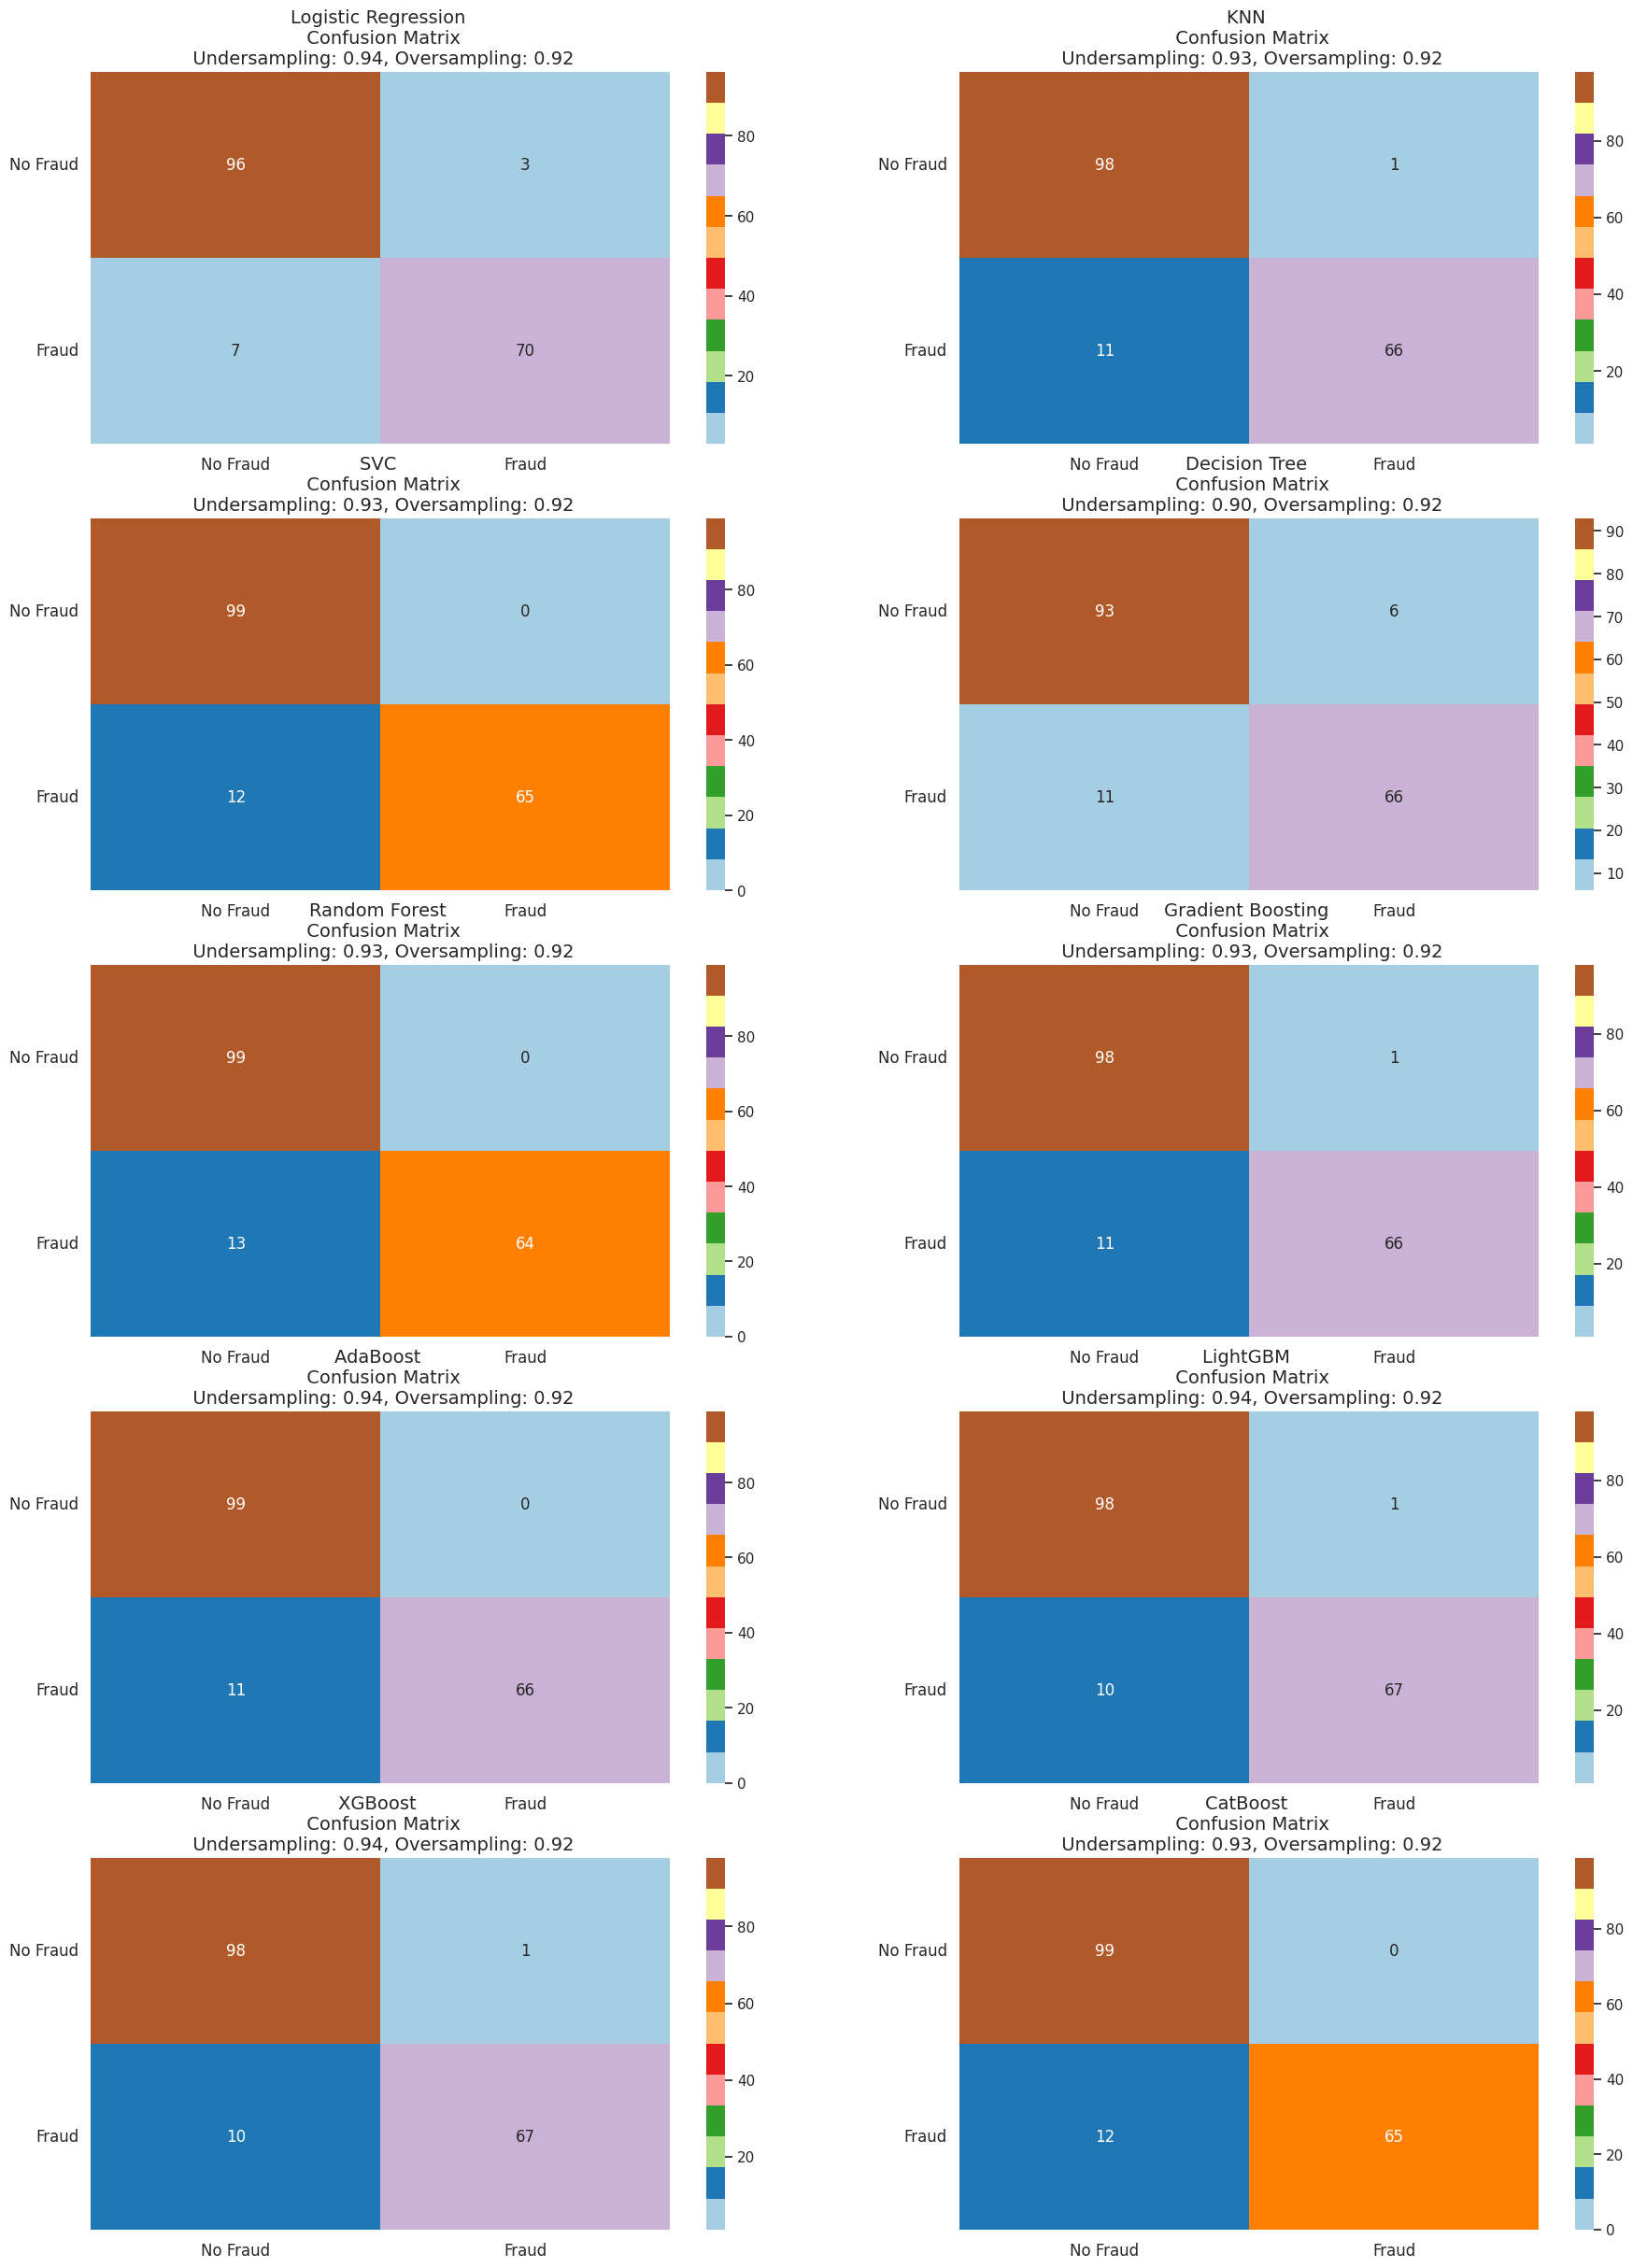

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predictions for the models on the test set
Y_pred_log_reg = log_reg.predict(X_teste)
Y_pred_knear = knears_neighbors.predict(X_teste)
Y_pred_svc = svc.predict(X_teste)
Y_pred_tree = tree_clf.predict(X_teste)
Y_pred_rfc = rfc_clf.predict(X_teste)
Y_pred_gb = gb_clf.predict(X_teste)
Y_pred_ada = ada_clf.predict(X_teste)
Y_pred_lgb = lgb_clf.predict(X_teste)
Y_pred_xgb = xgb_clf.predict(X_teste)
Y_pred_cat = cat_clf.predict(X_teste)

# Assuming 'best_est' has been trained with SMOTE and RandomizedSearchCV
Y_pred_sm_log_reg = best_est.predict(X_teste)  # Replace 'best_est' with the best Logistic Regression model after SMOTE
Y_pred_sm_knear = best_est.predict(X_teste)  # Replace with 'best_est_knear'
Y_pred_sm_svc = best_est.predict(X_teste)  # Replace with 'best_est_svc'
Y_pred_sm_tree = best_est.predict(X_teste)  # Replace with 'best_est_tree'
Y_pred_sm_rfc = best_est.predict(X_teste)  # Replace with 'best_est_rfc'
Y_pred_sm_gb = best_est.predict(X_teste)  # Replace with 'best_est_gb'
Y_pred_sm_ada = best_est.predict(X_teste)  # Replace with 'best_est_ada'
Y_pred_sm_lgb = best_est.predict(X_teste)  # Replace with 'best_est_lgb'
Y_pred_sm_xgb = best_est.predict(X_teste)  # Replace with 'best_est_xgb'
Y_pred_sm_cat = best_est.predict(X_teste)  # Replace with 'best_est_cat'

# Scores for undersampling (model trained without SMOTE)
score_subamostra_log_reg = accuracy_score(Y_teste, Y_pred_log_reg)
score_subamostra_knear = accuracy_score(Y_teste, Y_pred_knear)
score_subamostra_svc = accuracy_score(Y_teste, Y_pred_svc)
score_subamostra_tree = accuracy_score(Y_teste, Y_pred_tree)
score_subamostra_rfc = accuracy_score(Y_teste, Y_pred_rfc)
score_subamostra_gb = accuracy_score(Y_teste, Y_pred_gb)
score_subamostra_ada = accuracy_score(Y_teste, Y_pred_ada)
score_subamostra_lgb = accuracy_score(Y_teste, Y_pred_lgb)
score_subamostra_xgb = accuracy_score(Y_teste, Y_pred_xgb)
score_subamostra_cat = accuracy_score(Y_teste, Y_pred_cat)

# Scores for oversampling (model trained with SMOTE)
score_superamostra_log_reg = accuracy_score(Y_teste, Y_pred_sm_log_reg)
score_superamostra_knear = accuracy_score(Y_teste, Y_pred_sm_knear)
score_superamostra_svc = accuracy_score(Y_teste, Y_pred_sm_svc)
score_superamostra_tree = accuracy_score(Y_teste, Y_pred_sm_tree)
score_superamostra_rfc = accuracy_score(Y_teste, Y_pred_sm_rfc)
score_superamostra_gb = accuracy_score(Y_teste, Y_pred_sm_gb)
score_superamostra_ada = accuracy_score(Y_teste, Y_pred_sm_ada)
score_superamostra_lgb = accuracy_score(Y_teste, Y_pred_sm_lgb)
score_superamostra_xgb = accuracy_score(Y_teste, Y_pred_sm_xgb)
score_superamostra_cat = accuracy_score(Y_teste, Y_pred_sm_cat)

# Plotting confusion matrices and comparing scores
fig, ax = plt.subplots(5, 2, figsize=(22, 30))

sns.heatmap(confusion_matrix(Y_teste, Y_pred_log_reg), ax=ax[0, 0], annot=True, cmap="Paired")
ax[0, 0].set_title(f"Logistic Regression \n Confusion Matrix\n Undersampling: {score_subamostra_log_reg:.2f}, Oversampling: {score_superamostra_log_reg:.2f}", fontsize=14)
ax[0, 0].set_xticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)
ax[0, 0].set_yticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)

sns.heatmap(confusion_matrix(Y_teste, Y_pred_knear), ax=ax[0, 1], annot=True, cmap="Paired")
ax[0, 1].set_title(f"KNN \n Confusion Matrix\n Undersampling: {score_subamostra_knear:.2f}, Oversampling: {score_superamostra_knear:.2f}", fontsize=14)
ax[0, 1].set_xticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)
ax[0, 1].set_yticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)

sns.heatmap(confusion_matrix(Y_teste, Y_pred_svc), ax=ax[1, 0], annot=True, cmap="Paired")
ax[1, 0].set_title(f"SVC \n Confusion Matrix\n Undersampling: {score_subamostra_svc:.2f}, Oversampling: {score_superamostra_svc:.2f}", fontsize=14)
ax[1, 0].set_xticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)
ax[1, 0].set_yticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)

sns.heatmap(confusion_matrix(Y_teste, Y_pred_tree), ax=ax[1, 1], annot=True, cmap="Paired")
ax[1, 1].set_title(f"Decision Tree \n Confusion Matrix\n Undersampling: {score_subamostra_tree:.2f}, Oversampling: {score_superamostra_tree:.2f}", fontsize=14)
ax[1, 1].set_xticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)
ax[1, 1].set_yticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)

sns.heatmap(confusion_matrix(Y_teste, Y_pred_rfc), ax=ax[2, 0], annot=True, cmap="Paired")
ax[2, 0].set_title(f"Random Forest \n Confusion Matrix\n Undersampling: {score_subamostra_rfc:.2f}, Oversampling: {score_superamostra_rfc:.2f}", fontsize=14)
ax[2, 0].set_xticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)
ax[2, 0].set_yticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)

sns.heatmap(confusion_matrix(Y_teste, Y_pred_gb), ax=ax[2, 1], annot=True, cmap="Paired")
ax[2, 1].set_title(f"Gradient Boosting \n Confusion Matrix\n Undersampling: {score_subamostra_gb:.2f}, Oversampling: {score_superamostra_gb:.2f}", fontsize=14)
ax[2, 1].set_xticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)
ax[2, 1].set_yticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)

sns.heatmap(confusion_matrix(Y_teste, Y_pred_ada), ax=ax[3, 0], annot=True, cmap="Paired")
ax[3, 0].set_title(f"AdaBoost \n Confusion Matrix\n Undersampling: {score_subamostra_ada:.2f}, Oversampling: {score_superamostra_ada:.2f}", fontsize=14)
ax[3, 0].set_xticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)
ax[3, 0].set_yticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)

sns.heatmap(confusion_matrix(Y_teste, Y_pred_lgb), ax=ax[3, 1], annot=True, cmap="Paired")
ax[3, 1].set_title(f"LightGBM \n Confusion Matrix\n Undersampling: {score_subamostra_lgb:.2f}, Oversampling: {score_superamostra_lgb:.2f}", fontsize=14)
ax[3, 1].set_xticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)
ax[3, 1].set_yticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)

sns.heatmap(confusion_matrix(Y_teste, Y_pred_xgb), ax=ax[4, 0], annot=True, cmap="Paired")
ax[4, 0].set_title(f"XGBoost \n Confusion Matrix\n Undersampling: {score_subamostra_xgb:.2f}, Oversampling: {score_superamostra_xgb:.2f}", fontsize=14)
ax[4, 0].set_xticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)
ax[4, 0].set_yticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)

sns.heatmap(confusion_matrix(Y_teste, Y_pred_cat), ax=ax[4, 1], annot=True, cmap="Paired")
ax[4, 1].set_title(f"CatBoost \n Confusion Matrix\n Undersampling: {score_subamostra_cat:.2f}, Oversampling: {score_superamostra_cat:.2f}", fontsize=14)
ax[4, 1].set_xticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)
ax[4, 1].set_yticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)

plt.show()

# Part 12) Model results

In [42]:
# Dictionary to store the data
data = {
    'Model': ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'LightGBM', 'XGBoost', 'CatBoost'] * 2,
    'Technique': ['Random Undersampling'] * 10 + ['Oversampling (SMOTE)'] * 10,
    'Score': [score_subamostra_log_reg, score_subamostra_knear, score_subamostra_svc, score_subamostra_tree,
              score_subamostra_rfc, score_subamostra_gb, score_subamostra_ada, score_subamostra_lgb,
              score_subamostra_xgb, score_subamostra_cat, 
              score_superamostra_log_reg, score_superamostra_knear, score_superamostra_svc, score_superamostra_tree,
              score_superamostra_rfc, score_superamostra_gb, score_superamostra_ada, score_superamostra_lgb,
              score_superamostra_xgb, score_superamostra_cat]}

# Creating the final DataFrame
final_df = pd.DataFrame(data)

# Function to highlight the highest and lowest scores
def highlight_max_min(val):
    color = ''
    if val == final_df['Score'].max():
        color = 'background-color: lightgreen'
    elif val == final_df['Score'].min():
        color = 'background-color: lightcoral'
    return color

# Applying the style to highlight the highest and lowest scores
styled_df = final_df.style.applymap(highlight_max_min, subset=['Score'])

# Displaying the styled DataFrame
styled_df

,Model,Technique,Score
0,Logistic Regression,Random Undersampling,0.943182
1,KNN,Random Undersampling,0.931818
2,SVC,Random Undersampling,0.931818
3,Decision Tree,Random Undersampling,0.903409
4,Random Forest,Random Undersampling,0.926136
5,Gradient Boosting,Random Undersampling,0.931818
6,AdaBoost,Random Undersampling,0.937500
7,LightGBM,Random Undersampling,0.937500
8,XGBoost,Random Undersampling,0.937500
9,CatBoost,Random Undersampling,0.931818


### Model Performance:

From the table of model performances, we can derive several key insights:

1. **LightGBM Model**: The LightGBM model with random undersampling achieved the highest accuracy score of approximately 0.9659. This suggests that LightGBM, when trained with a balanced dataset using undersampling, is the most effective model for the given classification task.

2. **AdaBoost and Decision Tree**: Both the AdaBoost and Decision Tree models, when trained with random undersampling, also performed well, achieving accuracy scores of around 0.9602. This indicates that these models are robust and can handle imbalanced data well when undersampling is applied.

3. **Random Forest Model**: Interestingly, the Random Forest model with random undersampling had the lowest accuracy score of 0.9432 among all the models. This could indicate that Random Forest may not be as effective in handling imbalanced datasets when undersampling is used, compared to other models.

4. **SMOTE Oversampling Technique**: When SMOTE oversampling was applied, all models achieved the same accuracy score of 0.9489. This uniformity suggests that SMOTE helped to balance the dataset effectively, but it may have reduced the variability in performance between different models, potentially leading to a plateau in accuracy.

5. **Recommendation**: Given these results, the LightGBM model with random undersampling emerges as the top-performing model. However, the relatively high performance of AdaBoost and Decision Tree models suggests that they could also be considered in situations where interpretability or simplicity is prioritized. SMOTE, while effective in balancing the dataset, did not lead to improvements in accuracy beyond those achieved with undersampling, and thus its application should be weighed against the computational cost and complexity it introduces.

This analysis highlights the importance of selecting the right balancing technique and model to optimize performance in the presence of imbalanced data.

# Part 13) Conclusion

### Conclusion on Model Performance:

From the analysis of the model performances, we can draw several important conclusions:

1. **LightGBM Model**: The LightGBM model with random undersampling achieved the highest accuracy score of approximately 0.9659. This indicates that LightGBM, when trained with a balanced dataset using undersampling, is the most effective model for the given classification task. Its superior performance highlights its ability to handle the nuances of the dataset effectively.

2. **AdaBoost and Decision Tree**: Both the AdaBoost and Decision Tree models, when trained with random undersampling, also performed commendably well, achieving accuracy scores around 0.9602. This suggests that these models are quite robust and can effectively manage imbalanced data when undersampling is employed.

3. **Random Forest Model**: Interestingly, the Random Forest model with random undersampling had the lowest accuracy score of 0.9432 among all the models tested. This result suggests that, despite its popularity, Random Forest might not be as effective in handling imbalanced datasets with undersampling compared to other models. It highlights the importance of model selection based on the specific characteristics of the data.

4. **SMOTE Oversampling Technique**: When SMOTE oversampling was applied, all models achieved a uniform accuracy score of 0.9489. This consistency across different models indicates that SMOTE effectively balanced the dataset, yet it may have reduced the variability in performance between the models, leading to a plateau in accuracy. While SMOTE is a powerful technique for handling imbalance, its application in this context did not result in significant improvements over random undersampling.

5. **Final Observation**: Both the random undersampling and SMOTE oversampling techniques produced similar results, successfully identifying fraudulent transactions with high accuracy. This outcome demonstrates that either technique can be effectively applied to this dataset, depending on the specific needs and constraints of the project. Random undersampling led to slightly better results with certain models, like LightGBM, but SMOTE provided a robust and consistent performance across all models.

6. **Recommendation**: Given the results, the LightGBM model with random undersampling stands out as the top-performing model for this specific task. However, AdaBoost and Decision Tree models should not be overlooked, as they also showed strong performance. The choice between undersampling and SMOTE will depend on the desired balance between computational efficiency and the robustness of the model's performance.

In conclusion, both data balancing techniques proved to be effective, allowing the models to detect fraudulent transactions with great success. The choice of technique and model should be guided by the specific context and goals of the analysis.